In [ ]:
## Processes module 5
# outputs CSES_int_5 dataframe ready to be appended to the CSES IMD dataset
# also outputs the CSES_int_final dataframe of CSES IMD with module 5 appended and dtypes cleaned up a little

In [1]:
%%time
%matplotlib inline
%run Prosser_header.py

Toggle code

Wall time: 3.42 s


In [2]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

In [3]:
CSES_int = pd.read_stata(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"cses_imd.dta")

In [4]:
CSES_5 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")

In [74]:
def get_dta_meta(fn):
    reader = pd.io.stata.StataReader( fn )
    header = reader.variable_labels()
    labels = reader.value_labels()
    return header,labels

header5,labels5 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")
header4,labels4 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 4"+os.sep+"cses4.dta")
header3,labels3 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 3"+os.sep+"cses3.dta")
header2,labels2 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 2"+os.sep+"cses2.dta")
header1,labels1 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 1"+os.sep+"cses1.dta")
headerINT,labelsINT = get_dta_meta(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"cses_imd.dta")

In [5]:
CSES_int_5 = CSES_int.loc[[]].copy()

In [6]:
Int_variable_df_fi = pd.read_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"Int_variable_df_filledin.csv")

In [7]:
Int_variable_df_fi["var_descr_E"].isnull().sum()

21

In [8]:
int_or_ds_specific = (Int_variable_df_fi["INT_only"].notnull() | Int_variable_df_fi["Dataset_specific"].notnull())

In [9]:
Int_variable_df_fi[int_or_ds_specific&Int_variable_df_fi["var_descr_E"].notnull()]

,Unnamed: 0,description,20% matching contents_A,20% matching contents(length)_A,Top Score_A,Top Match_A,20% matching contents_B,20% matching contents(length)_B,Top Score_B,Top Match_B,...,var_descr_C,var_descr_D,var_descr_E,Match_A_discrepancy,Match_B_discrepancy,Match_C_discrepancy,Match_D_discrepancy,INT_only,Dataset_specific,notes
0,IMD1001,dataset,{},0,NaN,NaN,{},0,NaN,NaN,...,C1001,D1001,E1001,NaN,NaN,NaN,NaN,NaN,x,NaN
1,IMD1002_VER,DATASET VERSION,{},0,NaN,NaN,{},0,NaN,NaN,...,C1002_VER,D1002_VER,E1002_VER,NaN,NaN,NaN,NaN,NaN,x,NaN
2,IMD1002_DOI,DIGITAL OBJECT IDENTIFIER,{},0,NaN,NaN,{},0,NaN,NaN,...,C1002_DOI,D1002_DOI,E1002_DOI,NaN,NaN,NaN,NaN,NaN,x,NaN
29,IMD1014_1,INTERVIEW TIMING - NUMBER OF DAYS BETWEEN INTE...,{'A2026': 0.515839061673797},1,0.515839,A2026,{'B2032': 0.5855795567729084},1,0.585580,B2032,...,C2032,D1029,E1035_1,NaN,NaN,NaN,NaN,x,NaN,NaN
30,IMD1014_2,INTERVIEW TIMING - NUMBER OF DAYS BETWEEN INTE...,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E1035_2,NaN,NaN,NaN,NaN,x,NaN,NaN
33,IMD1016_2,MODE OF INTERVIEW - STUDY SECOND,{},0,NaN,NaN,"{'B3020': 0.8771632221115537, 'B3008': 0.83414...",22,0.877163,B3020,...,NaN,NaN,E1024_2,NaN,NaN,NaN,NaN,x,NaN,NaN
34,IMD1016_3,MODE OF INTERVIEW - STUDY THIRD,{},0,NaN,NaN,"{'B3020': 1.0, 'B3008': 0.9334225597609562, 'B...",22,1.000000,B3020,...,NaN,NaN,E1024_3,NaN,NaN,NaN,NaN,x,NaN,NaN
117,IMD5000_A,PARTY A IDENTIFIER - NUMERICAL,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E5000_A,NaN,NaN,NaN,NaN,x,NaN,NaN
118,IMD5000_B,PARTY B IDENTIFIER - NUMERICAL,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E5000_B,NaN,NaN,NaN,NaN,x,NaN,NaN
119,IMD5000_C,PARTY C IDENTIFIER - NUMERICAL,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,E5000_C,NaN,NaN,NaN,NaN,x,NaN,NaN


In [10]:
Int_variable_df_fi[ Int_variable_df_fi["var_descr_E"].isnull() & ~int_or_ds_specific ]

,Unnamed: 0,description,20% matching contents_A,20% matching contents(length)_A,Top Score_A,Top Match_A,20% matching contents_B,20% matching contents(length)_B,Top Score_B,Top Match_B,...,var_descr_C,var_descr_D,var_descr_E,Match_A_discrepancy,Match_B_discrepancy,Match_C_discrepancy,Match_D_discrepancy,INT_only,Dataset_specific,notes
35,IMD2001_1,AGE OF RESPONDENT (IN YEARS),{'A2001': 0.959428928519925},1,0.959429,A2001,{'B2001': 0.9631318476095617},1,0.963132,B2001,...,C2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In mod 4/5, it becomes date of birth 2001_M,20..."
55,IMD3002_UH_DC_3,CURRENT UPPER HOUSE ELECTION: VOTE CHOICE - DI...,{},0,NaN,NaN,{},0,NaN,NaN,...,C3023_UH_DC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,IMD3002_UH_DC_4,CURRENT UPPER HOUSE ELECTION: VOTE CHOICE - DI...,{},0,NaN,NaN,{},0,NaN,NaN,...,C3023_UH_DC_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,IMD3004_UH_DC_3,PREVIOUS UPPER HOUSE ELECTION: VOTE CHOICE - D...,{},0,NaN,NaN,{},0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,IMD3013_2,STATE OF ECONOMY - BETTER,{'A3024': 0.25086125398580333},1,0.250861,A3024,"{'B3020': 0.9991284860557769, 'B3008': 0.93255...",22,0.999128,B3020,...,NaN,D3003_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,IMD3013_3,STATE OF ECONOMY - WORSE,{'A3025': 0.22650579243378358},1,0.226506,A3025,"{'B3020': 0.9891060756972112, 'B3008': 0.92252...",22,0.989106,B3020,...,NaN,D3003_3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
109,IMD3015_1,DICHOTOMIZED POLITICAL INFORMATION ITEM - 1ST,"{'A2023': 0.5196365908763159, 'A2024': 0.29665...",3,0.519637,A2023,"{'B3047_1': 0.7850317480079682, 'B3047_2': 0.5...",3,0.785032,B3047_1,...,C3036_1,D3025_1_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,IMD3015_2,DICHOTOMIZED POLITICAL INFORMATION ITEM - 2ND,"{'A2024': 0.35490073547084555, 'A2023': 0.2966...",2,0.354901,A2024,"{'B3047_2': 0.6104488296812749, 'B3047_1': 0.5...",3,0.610449,B3047_2,...,C3036_2,D3025_2_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,IMD3015_3,DICHOTOMIZED POLITICAL INFORMATION ITEM - 3RD,"{'A2025': 0.23881170984954092, 'A2023': 0.2071...",2,0.238812,A2025,"{'B3047_3': 0.43275336155378485, 'B3047_1': 0....",3,0.432753,B3047_3,...,C3036_3,D3025_3_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,IMD3015_4,DICHOTOMIZED POLITICAL INFORMATION ITEM - 4TH,{},0,NaN,NaN,"{'B3020': 1.0, 'B3008': 0.9334225597609562, 'B...",22,1.000000,B3020,...,NaN,D3025_4_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
missing_dict = dict(zip(["99. MISSING","97. VOLUNTEERED: REFUSED","98. VOLUNTEERED: DON'T KNOW",
                "9997. VOLUNTEERED: REFUSED","9998. VOLUNTEERED: DON'T KNOW","9999. MISSING"],[np.nan]*6))
CSES_5["E2001_Y"].value_counts().sort_index()

birth_year = CSES_5["E2001_Y"].replace(missing_dict).astype(float)
birth_year

birth_month = CSES_5["E2001_M"].replace(missing_dict).apply(lambda x: int(x[0:2]) if pd.notnull(x) else np.nan)
birth_month.value_counts()

#     E2001_M      >>> D01a    DATE OF BIRTH OF RESPONDENT - MONTH
#     E2001_Y      >>> D01b    DATE OF BIRTH OF RESPONDENT - YEAR


# lots of mossing months, a lot of studies didn't ask for birth year/month but age - either at a fixed point (June 30th)
# or at the interview time ... kind of unclear why they didn't include an age column!
# I guess we just set month as June by default and day by 14

birth_year.isnull().sum(),birth_month.isnull().sum()

# when year present but month missing, replace with June (most common and also the ref point used for some studies)
birth_month[birth_year.notnull()&birth_month.isnull()] = 6.0
# when month present but year missing (N=34), drop month so this is recorded as birthdate unknown!
birth_month[birth_year.isnull()&birth_month.notnull()] = np.nan

birth_date = pd.to_datetime((birth_year.astype(str)+birth_month.astype(str)).apply(lambda x: x.replace(".0","\\")+"14" if x!="nannan" else np.nan),
              format = "%Y\\%M\\%d")

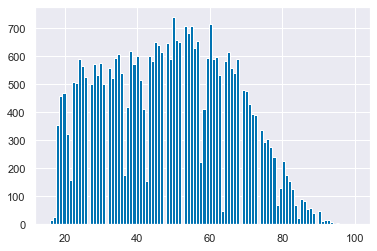

In [12]:
#     E1016        >>>         DATE 1ST ROUND ELECTION BEGAN - MONTH
#     E1017        >>>         DATE 1ST ROUND ELECTION BEGAN - DAY
#     E1018        >>>         DATE 1ST ROUND ELECTION BEGAN - YEAR

# figure out election date

election_date = pd.to_datetime(CSES_5["E1018"].astype(str)+"\\"+CSES_5["E1016"].apply(lambda x: x[0:2]).astype(str)+"\\"+CSES_5["E1017"].astype(str),
               format = "%Y\\%M\\%d")

age_at_election = (election_date - birth_date).dt.days/365.25
age_at_election.hist(bins=100)
age_at_election = age_at_election.apply(lambda x: np.floor(x))


missing_value_rows = CSES_5["E2001_Y"].apply(lambda x: x in missing_dict.keys())
age_at_election[missing_value_rows] = CSES_5["E2001_Y"][missing_value_rows]

# age in years
CSES_int_5["IMD2001_1"] = age_at_election

# age in categories
age_at_election[~missing_value_rows.astype('bool')] = pd.cut(age_at_election[~missing_value_rows.astype('bool')],
       bins = [0,24,34,44,54,64,200],
       labels = CSES_int["IMD2001_2"].cat.categories[0:6])

CSES_int_5["IMD2001_2"] = age_at_election

In [13]:
int_to_mod5 = Int_variable_df_fi[Int_variable_df_fi["var_descr_E"].notnull()].set_index("Unnamed: 0")["var_descr_E"]

In [14]:
## okay - by inspection
# float64, int16, object dtypes 
for int_var in CSES_int[int_to_mod5.index].select_dtypes('float64').columns:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

for int_var in CSES_int[int_to_mod5.index].select_dtypes('int16').columns:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]
    
for int_var in CSES_int[int_to_mod5.index].select_dtypes('object').columns:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [16]:
int_cats = CSES_int[int_to_mod5.index].select_dtypes('category').apply(lambda x: "|".join([str(x) for x in x.cat.categories]))

In [17]:
mod5_cats = CSES_5[int_to_mod5.values].select_dtypes('category').apply(lambda x: "|".join([str(x) for x in x.cat.categories]))

In [18]:
matched_cats = CSES_int[int_to_mod5.index].select_dtypes('category').columns[(int_cats.values == mod5_cats.values)]
matched_cats

Index(['IMD2006', 'IMD2007', 'IMD3005_4', 'IMD3006', 'IMD3007_A', 'IMD3007_B',
       'IMD3007_C', 'IMD3007_D', 'IMD3007_E', 'IMD3007_F', 'IMD3007_G',
       'IMD3007_H', 'IMD3007_I', 'IMD3008_A', 'IMD3008_B', 'IMD3008_C',
       'IMD3008_D', 'IMD3008_E', 'IMD3008_F', 'IMD3008_G', 'IMD3008_H',
       'IMD3008_I', 'IMD3009_A', 'IMD3009_B', 'IMD3009_C', 'IMD3009_D',
       'IMD3009_E', 'IMD3009_F', 'IMD3009_G', 'IMD3009_H', 'IMD3009_I',
       'IMD3011', 'IMD3012', 'IMD5007', 'IMD5013', 'IMD5016_4', 'IMD5017_4',
       'IMD5018_2', 'IMD5018_4', 'IMD5031_I'],
      dtype='object')

In [19]:
for int_var in matched_cats:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [20]:
unmatched_cats = CSES_int[int_to_mod5.index].select_dtypes('category').columns[(int_cats.values != mod5_cats.values)]
unmatched_cats

Index(['IMD1003', 'IMD1007', 'IMD1009', 'IMD1011_M', 'IMD1011_D', 'IMD1011_Y',
       'IMD1012_M', 'IMD1012_D', 'IMD1012_Y', 'IMD1013_M',
       ...
       'IMD5056_1', 'IMD5056_2', 'IMD5056_3', 'IMD5057_1', 'IMD5057_2',
       'IMD5057_3', 'IMD5058_1', 'IMD5058_2', 'IMD5059_1', 'IMD5059_2'],
      dtype='object', length=202)

In [21]:
int_modes = CSES_int[unmatched_cats].describe(include='all').loc["top"]

In [22]:
mod5_modes = CSES_5[int_to_mod5.loc[unmatched_cats]].describe(include='all').loc["top"]

In [23]:
(int_modes.values==mod5_modes.values).sum(),(int_modes.values!=mod5_modes.values).sum(),

(79, 123)

In [24]:
int_cats_alpha = int_cats[unmatched_cats].apply(lambda x: "|".join( [cat for cat in x.split("|") if np.isnan(pd.to_numeric(cat,errors='coerce'))]))
int_cats_num = int_cats[unmatched_cats].apply(lambda x: [float(cat) for cat in x.split("|") if not np.isnan(pd.to_numeric(cat,errors='coerce'))]).apply(lambda x: (np.max(x),np.min(x)) if x!=[] else np.nan)
int_cats_num

IMD1003                          NaN
IMD1007                          NaN
IMD1009                          NaN
IMD1011_M                        NaN
IMD1011_D                (31.0, 1.0)
                      ...           
IMD5057_3    (309326304.0, 271128.0)
IMD5058_1               (14.1, 1.32)
IMD5058_2             (150.96, 2.15)
IMD5059_1              (13.33, 1.16)
IMD5059_2             (121.76, 1.75)
Length: 202, dtype: object

In [25]:
mod_cats_alpha = mod5_cats[int_to_mod5.loc[unmatched_cats]].apply(lambda x: "|".join([cat for cat in x.split("|") if np.isnan(pd.to_numeric(cat,errors='coerce'))]))
mod_cats_num = mod5_cats[int_to_mod5.loc[unmatched_cats]].apply(lambda x: [float(cat) for cat in x.split("|") if not np.isnan(pd.to_numeric(cat,errors='coerce'))]).apply(lambda x: (np.max(x),np.min(x)) if x!=[] else np.nan)
mod_cats_num

var_descr_E
E1003                          NaN
E1007                          NaN
E1015                          NaN
E1016                          NaN
E1017                  (29.0, 4.0)
                    ...           
E5098_3    (318622528.0, 327386.0)
E5078                (18.02, 2.82)
E5079                (18.02, 2.82)
E5080                (16.54, 2.09)
E5081                (16.54, 2.09)
Length: 202, dtype: object

In [26]:
int_cats_alpha[unmatched_cats][int_cats_alpha.values != mod_cats_alpha.values]

IMD1003      00802005. ALBANIA (2005)|03202015. ARGENTINA (...
IMD1007      001. [SEE ELECTION STUDY NOTES]|002. [SEE ELEC...
IMD1009      10. PARLIAMENTARY/LEGISLATIVE|12. PARLIAMENTAR...
IMD1011_M    01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
IMD1012_M    01. JANUARY|03. MARCH|04. APRIL|05. MAY|06. JU...
                                   ...                        
IMD5057_2    999999999. MISSING AND/OR NOT AVAILABLE AT TIM...
IMD5058_1    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
IMD5058_2    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
IMD5059_1    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
IMD5059_2    997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCU...
Length: 129, dtype: object

In [27]:
mod_cats_alpha[int_to_mod5.loc[unmatched_cats]][int_cats_alpha.values != mod_cats_alpha.values]

var_descr_E
E1003      03602019. AUSTRALIA (2019)|04002017. AUSTRIA (...
E1007      001. [SEE ELECTION STUDY NOTES]|002. [SEE ELEC...
E1015      10. PARLIAMENTARY/LEGISLATIVE|12. PARLIAMENTAR...
E1016      01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
E1019      05. MAY|10. OCTOBER|12. DECEMBER|96. NOT APPLI...
                                 ...                        
E5098_2                                                     
E5078      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
E5079      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
E5080      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
E5081      997. PRESIDENTIAL ELECTION ONLY - NOT CALCULAT...
Length: 129, dtype: object

In [28]:
mod5_int_category_discrepancies = pd.DataFrame()
mod5_int_category_discrepancies["int_var"] = int_cats_alpha[unmatched_cats][int_cats_alpha.values != mod_cats_alpha.values].index
mod5_int_category_discrepancies["int_cat"] = int_cats_alpha[unmatched_cats][int_cats_alpha.values != mod_cats_alpha.values].values
mod5_int_category_discrepancies["mod_var"] = mod_cats_alpha[int_to_mod5.loc[unmatched_cats]][int_cats_alpha.values != mod_cats_alpha.values].index
mod5_int_category_discrepancies["mod_cat"] = mod_cats_alpha[int_to_mod5.loc[unmatched_cats]][int_cats_alpha.values != mod_cats_alpha.values].values


In [29]:
mod5_int_category_discrepancies.to_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"mod5_int_category_discrepancies.csv")

In [92]:
# (set(int_to_mod5.index) - set(unmatched_cats)) - set(matched_cats)

# discrepancy between matched and unmatched cats == 'float64','int16','object' columns

In [93]:
# CSES_5["E1016"].value_counts()
# really, no december
# 21 studies ... pretty realistic

In [30]:
# CSES_5["E1019"].value_counts()
# CSES_int_5["IMD1016_1"]

In [31]:
# IMD1015 and E1023 - same variable name, but different contents
# -> one is about study timing, the other about study context
# updated in csv

int_to_mod5.drop("IMD1015",errors='ignore',inplace=True)

In [32]:
def replace_categories(ser, replace_dict, int_ser):
    return ser.replace(replace_dict).astype('category').cat.set_categories(int_ser.cat.categories,
                                                                                    ordered = int_ser.cat.ordered)

In [33]:
#{IMD1016_1, E1024_1}
# need to be harmonized!
# 1. FACE-TO-FACE|2. TELEPHONE|3. MAIL OR SELF-COMPLETED SUPPLEMENT|4. INTERNET|9. MISSING
# 1. IN PERSON, FACE-TO-FACE - USING A QUESTIONNAIRE ON PAPER|2. IN PERSON, FACE-TO-FACE - USING AN ELECTRONIC/COMPUTERIZED QUESTIONNAIRE|3. TELEPHONE|4. MAIL OR SELF-COMPLETION SUPPLEMENT|5. INTERNET

# IMD1016_2	3. MAIL OR SELF-COMPLETED SUPPLEMENT|9. MISSING	E1024_2	0. NOT APPLICABLE|3. TELEPHONE|5. INTERNET
# IMD1016_3	9. MISSING	E1024_3	0. NOT APPLICABLE

# CSES_5["E1024_1"].value_counts()

replace_dict = {"0. NOT APPLICABLE":"9. MISSING",
    "1. IN PERSON, FACE-TO-FACE - USING A QUESTIONNAIRE ON PAPER":"1. FACE-TO-FACE",
 "2. IN PERSON, FACE-TO-FACE - USING AN ELECTRONIC/COMPUTERIZED QUESTIONNAIRE":"1. FACE-TO-FACE",
 "3. TELEPHONE":"2. TELEPHONE",
 "4. MAIL OR SELF-COMPLETION SUPPLEMENT":"3. MAIL OR SELF-COMPLETED SUPPLEMENT",
 "5. INTERNET":"4. INTERNET",}




# temp = CSES_5["E1024_1"].replace(replace_dict).astype('category').cat.set_categories(CSES_int["IMD1016_1"].cat.categories,
#                                                                                     ordered = CSES_int["IMD1016_1"].cat.ordered)

# CSES_int["IMD1016_1"].append(temp)

# CSES_int_5["IMD1016_1"]

CSES_int_5["IMD1016_1"] = replace_categories(CSES_5["E1024_1"], replace_dict, CSES_int["IMD1016_1"])
CSES_int_5["IMD1016_2"] = replace_categories(CSES_5["E1024_2"], replace_dict, CSES_int["IMD1016_1"])
CSES_int_5["IMD1016_3"] = replace_categories(CSES_5["E1024_3"], replace_dict, CSES_int["IMD1016_1"])

In [34]:
# gender: trivial harmonising
# IMD2002	1. MALE|2. FEMALE|3. [SEE ELECTION STUDY NOTES]|7. REFUSED|9. MISSING	E2002	1. MALE|2. FEMALE|3. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|9. MISSING

rename_dict = {"7. VOLUNTEERED: REFUSED":"7. REFUSED"}
CSES_int_5["IMD2002"] = CSES_5["E2002"].cat.rename_categories(rename_dict)

In [35]:
# education: non-trivial harmonising
# IMD2003	0. NONE (NO EDUCATION) / ILLITERATE|1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION|2. HIGHER SECONDARY EDUCATION|3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION|4. UNIVERSITY EDUCATION|6. OTHER|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E2003	01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION|02. ISCED LEVEL 1 - PRIMARY|03. ISCED LEVEL 2 - LOWER SECONDARY|04. ISCED LEVEL 3 - UPPER SECONDARY|05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY|06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY|07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT|08. ISCED LEVEL 7 - MASTER OR EQUIVALENT|09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT|96. NONE (NO EDUCATION)|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING

# Mod 5
#  01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION
#  02. ISCED LEVEL 1 - PRIMARY
#  03. ISCED LEVEL 2 - LOWER SECONDARY
#  04. ISCED LEVEL 3 - UPPER SECONDARY
#  05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY
#  06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY
#  07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT
#  08. ISCED LEVEL 7 - MASTER OR EQUIVALENT
#  09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT

#  96. NONE (NO EDUCATION)

#  97. VOLUNTEERED: REFUSED
#  98. VOLUNTEERED: DON'T KNOW

#  99. MISSING

# IMD 

#  0. NONE (NO EDUCATION)/ILLITERATE
#  1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION
#  2. HIGHER SECONDARY EDUCATION
#  3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION 
#  4. UNIVERSITY EDUCATION
#  6. OTHER [SEE Standalone CSES MODULE CODEBOOK]

#  7. VOLUNTEERED: REFUSED
#  8. VOLUNTEERED: DON'T KNOW

#  9. MISSING

#  |      +++ TABLE: MAPPING OF EDUCATION CODES IN CSES MODULE 4
#  |                  TO EDUCATION CODES IN CSES IMD
#  | 
#  | IMD CODE   CSES MODULE 4 CLASSIFICATION (CSES MODULE 4 CODE)
#  |-----------------------------------------------------------------
#  |        0.  None/ISCED Level 0 - Early Childhood Education (0/96)
#  |        1.  ISCED Level 1 - Primary & ISCED Level 2 Lower
#  |            Secondary (2/3)
#  |        2.  ISCED Level 3 - Upper Secondary
#  |        3.  ISCED Level 4 - Post-Secondary Non-Tertiary
#  |            ISCED Level 5 - Short-Cycle Tertiary
#  |        4.  ISCED Level 6 - Bachelor or equivalent
#  |            ISCED Level 7 - Master or equivalent
#  |            ISCED Level 8 - Doctoral or equivalent


replace_dict = {      '01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION':'0. NONE (NO EDUCATION) / ILLITERATE',
       '02. ISCED LEVEL 1 - PRIMARY':'1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION',
       '03. ISCED LEVEL 2 - LOWER SECONDARY':'1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION',
       '04. ISCED LEVEL 3 - UPPER SECONDARY':'2. HIGHER SECONDARY EDUCATION',
       '05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY':'3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION',
       '06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY':'3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION',
       '07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT':'4. UNIVERSITY EDUCATION',
       '08. ISCED LEVEL 7 - MASTER OR EQUIVALENT':'4. UNIVERSITY EDUCATION',
       '09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT':'4. UNIVERSITY EDUCATION',
       '96. NONE (NO EDUCATION)':'0. NONE (NO EDUCATION) / ILLITERATE',
       '97. VOLUNTEERED: REFUSED':'7. VOLUNTEERED: REFUSED',
       "98. VOLUNTEERED: DON'T KNOW":"8. VOLUNTEERED: DON'T KNOW",
       '99. MISSING':'9. MISSING'}


CSES_int_5["IMD2003"] = replace_categories(CSES_5["E2003"], replace_dict, CSES_int["IMD2003"])


In [36]:
# marital: trivial harmonising
# IMD2004	1. MARRIED OR LIVING TOGETHER AS MARRIED|2. WIDOWED|3. DIVORCED OR SEPARATED (MARRIED BUT SEPARATED/NOT LIVING WITH LEGAL SPOUSE)|4. SINGLE, NEVER MARRIED|5. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E2004	1. MARRIED OR LIVING TOGETHER AS MARRIED|2. WIDOWED|3. DIVORCED OR SEPARATED|4. SINGLE, NEVER MARRIED|5. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING

rename_dict = {'1. MARRIED OR LIVING TOGETHER AS MARRIED': '1. MARRIED OR LIVING TOGETHER AS MARRIED',
 '2. WIDOWED': '2. WIDOWED',
 '3. DIVORCED OR SEPARATED': '3. DIVORCED OR SEPARATED (MARRIED BUT SEPARATED/NOT LIVING WITH LEGAL SPOUSE)',
 '4. SINGLE, NEVER MARRIED': '4. SINGLE, NEVER MARRIED',
 '5. [SEE ELECTION STUDY NOTES]': '5. [SEE ELECTION STUDY NOTES]',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD2004"] = CSES_5["E2004"].cat.rename_categories(rename_dict)

In [37]:
# religion: non-trivial harmonising
# IMD2005	1. CATHOLIC|2. PROTESTANT|3. ORTHODOX/EASTERN CATHOLIC CHURCHES|4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)|5. JEWISH|6. ISLAM - SUNNI|7. ISLAM - OTHER|8. BUDDHISM|9. HINDUISM|10. INDIGENOUS|11. ETHNORELIGIONS|12. NON-BELIEVERS|13. AGNOSTICS|96. OTHER: NOT SPECIFIED|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING	E2013	1000. CHRISTIAN (NO DENOMINATION GIVEN)|1101. ROMAN CATHOLIC|1199. CATHOLIC, OTHER [SEE ELECTION STUDY VARIABLE NOTES]|1200. PROTESTANT, NO DENOMINATION GIVEN|1201. ADVENTIST|1203. BAPTIST|1205. EUROPEAN FREE CHURCH (ANABAPTISTS, MENNONITES)|1206. HOLINESS|1208. LUTHERAN|1209. METHODIST|1210. PENTECOSTAL|1211. PRESBYTERIAN|1213. SALVATION ARMY/SALVATIONIST|1214. CHRISTIAN BRETHEN|1215. CHURCHES OF CHRIST|1216. REFORMED CHURCHES|1298. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]|1299. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]|1300. EPISCOPALIAN, ANGLICAN, CHURCH OF ENGLAND, CHURCH OF IRELAND|1499. INDEPENDENT, OTHER [SEE ELECTION STUDY NOTES]|1501. CHRISTIAN SCIENTISTS|1502. MORMONS, CHURCH OF LATTER DAY SAINTS|1503. UNITARIAN UNIVERSALISTS|1504. JEHOVAH'S WITNESSES|1600. EASTERN ORTHODOX|1699. ORTHODOX, OTHER [SEE ELECTION STUDY NOTES]|2000. JEWISH|3000. MUSLIM; MOHAMMEDAN; ISLAM (NO DENOMINATION GIVEN)|4000. BUDDHIST|5000. HINDU|5600. SIKHISM|6100. CONFUCIANISM|6200. TAOISM|7100. PAGAN, HEATHEN, TRIBAL RELIGIONSIST, TRADITIONAL RELIGIONIST, ANIMISM, SHAMANISM|7110. RATANA, MAORI|7200. SPIRITISM|7500. BAHAI|7900. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]|7901. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]|8100. AGNOSTIC|8200. ATHEIST|8300. NONE|9001. [SEE ELECTION STUDY NOTES]|9002. [SEE ELECTION STUDY NOTES]|9003. [SEE ELECTION STUDY NOTES]|9004. [SEE ELECTION STUDY NOTES]|9005. [SEE ELECTION STUDY NOTES]|9600. OTHER: NOT SPECIFIED|9997. VOLUNTEERED: REFUSED|9998. VOLUNTEERED: DON'T KNOW|9999. MISSING
# dict(zip(CSES_5["E2013"].cat.categories,CSES_5["E2013"].cat.categories))


#  |        01. Roman Catholic (1/1101)
#  |            Catholic, Other [see Election Study Notes] (1199)
#  |        02. Protestant, no Denomination Given (2/1200)
#  |            Adventist (3/1201)
#  |            Episcopalian, Anglican, Church of England, 
#  |            Church of Ireland (4/1300)
#  |            Baptist (5/1203)
#  |            Congregational (6/1204)
#  |            European Free Church (Anabaptists) (7/1205)
#  |            Holiness (8/1206)
#  |            Independent-Fundamentalist (9/1401)
#  |            Lutheran (10/1208)
#  |            Methodist (11/1209)
#  |            Pentecostal (12/1210)
#  |            Presbyterian (13/1211)
#  |            Christian Scientists (14/1501)
#  |            Unitarian; Universalist (16/1503)
#  |            Reformed Calvinist (not Presb) / Calvinist (91/1212)
#  |            Salvation Army/Salvationist (1213)
#  |            Christian Brethren (1214)
#  |            Churches of Christ (1215)
#  |            Reformed Churches (1216)
#  |            Protestant Church of The Netherlands (1217)
#  |            Protestant, Other [see Election Study Notes] 
#  |            (1298/1299)               
#  |        03. Eastern Orthodox (Greek Rite Catholic) (17/1600)
#  |            Eastern Catholic Churches (e.g., Eastern Rite
#  |            Catholic, Greek Rite Cathole, Uniate) (19/1102)
#  |            Orthodox, Other [see Election Study Notes] (1699)
#  |        04. Christian (no Denomination Given) (18/1000)
#  |            Mormons; Latter Day Saints (15/1502)
#  |            Apostolic (1410)
#  |            United Churches (1420)
#  |            Independent, Other [see Election Study Notes] (1499)
#  |            Jehovah's Witnesses (1504)
#  |            Non-traditional Protestant, Other [see Election 
#  |            Study Notes] (1599)
#  |        05. Jewish (20/2000)
#  |        06. Sunni (33/3100)
#  |        07. Muslim; Mohammedan; Islam (no Denomination Given) 
#  |            (30/3000)
#  |            Kharijism (31)
#  |            Mu'tazilism (32)
#  |            Shi'ism (34/3200)
#  |            Isma'ilis (35/3210)
#  |            Baha'i (36/22)
#  |            Druse (37/3211)
#  |        08. Buddhist (40/4000)
#  |            Theravada (41/4100)
#  |            Mahayana (42/4200)
#  |            Tantrism (43)
#  |            Tibetan Buddhism (44)
#  |            Shingon (45)
#  |        09. Hindu (50/5000)
#  |            Jainism (51/5500)
#  |            Sikhism (52/5600)
#  |            Parsiism (53/5010)
#  |            Vedism (54)
#  |            Brahmanism (55)
#  |            Vaishnavism (56/5020)
#  |            Shaivism (57/5030)
#  |            Tantrism (58)
#  |            Shaktism (59/5040)
#  |            Folk Hinduism (60)
#  |        10. Confucianism (71/6100)
#  |            Taoism (72/6200)
#  |            Shinto (73/6300)
#  |            Bahai (74)
#  |            I-Kuan-Tao (75/6401)
#  |            New Religionists (6400)
#  |            Traditional Folk Belief/Nichiren Shoshu (6500)
#  |        11. Pagan, Heathen, Tribal Religionist, Traditional 
#  |            Religionist, Animism, Shamanism (7100)
#  |            Ratana, Maori (7110)
#  |            Spiritism (7200)
#  |            Bahai (7500)
#  |            Ehtnoreligionist, Other [see Election Study Notes] 
#  |            (7900/7901)
#  |        12. Atheists (82/92/8200)
#  |            None (83/93/8300)
#  |        13. Agnostics (81/91/8100)
#  |        96. Other Religions (80)
#  |            Other: Not Specified (9600)
#  |        97. Refused (97/9997)
#  |        98. Don't Know (98/9998)
#  |        99. Missing (99/9999)

# ['1. CATHOLIC',
#  '2. PROTESTANT',
#  '3. ORTHODOX/EASTERN CATHOLIC CHURCHES',
#  '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
#  '5. JEWISH',
#  '6. ISLAM - SUNNI',
#  '7. ISLAM - OTHER',
#  '8. BUDDHISM',
#  '9. HINDUISM',
#  '10. INDIGENOUS',
#  '11. ETHNORELIGIONS',
#  '12. NON-BELIEVERS',
#  '13. AGNOSTICS',
#  '96. OTHER: NOT SPECIFIED',
#  '97. VOLUNTEERED: REFUSED',
#  "98. VOLUNTEERED: DON'T KNOW",
#  '99. MISSING']


# no sunni category???
replace_dict = {'1000. CHRISTIAN (NO DENOMINATION GIVEN)': '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1101. ROMAN CATHOLIC': '1. CATHOLIC',
 '1199. CATHOLIC, OTHER [SEE ELECTION STUDY VARIABLE NOTES]': '1. CATHOLIC',
 '1200. PROTESTANT, NO DENOMINATION GIVEN': '2. PROTESTANT',
 '1201. ADVENTIST': '2. PROTESTANT',
 '1203. BAPTIST': '2. PROTESTANT',
 '1205. EUROPEAN FREE CHURCH (ANABAPTISTS, MENNONITES)':'2. PROTESTANT',
 '1206. HOLINESS': '2. PROTESTANT',
 '1208. LUTHERAN': '2. PROTESTANT',
 '1209. METHODIST': '2. PROTESTANT',
 '1210. PENTECOSTAL': '2. PROTESTANT',
 '1211. PRESBYTERIAN': '2. PROTESTANT',
 '1213. SALVATION ARMY/SALVATIONIST': '2. PROTESTANT',
 '1214. CHRISTIAN BRETHEN':'2. PROTESTANT',
 '1215. CHURCHES OF CHRIST': '2. PROTESTANT',
 '1216. REFORMED CHURCHES': '2. PROTESTANT',
 '1298. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]': '2. PROTESTANT',
 '1299. PROTESTANT, OTHER [SEE ELECTION STUDY NOTES]': '2. PROTESTANT',
 '1300. EPISCOPALIAN, ANGLICAN, CHURCH OF ENGLAND, CHURCH OF IRELAND': '2. PROTESTANT',
 '1499. INDEPENDENT, OTHER [SEE ELECTION STUDY NOTES]': '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1501. CHRISTIAN SCIENTISTS': '2. PROTESTANT',
 '1502. MORMONS, CHURCH OF LATTER DAY SAINTS': '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1503. UNITARIAN UNIVERSALISTS': '2. PROTESTANT',
 "1504. JEHOVAH'S WITNESSES": '4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)',
 '1600. EASTERN ORTHODOX': '3. ORTHODOX/EASTERN CATHOLIC CHURCHES',
 '1699. ORTHODOX, OTHER [SEE ELECTION STUDY NOTES]': '3. ORTHODOX/EASTERN CATHOLIC CHURCHES',
 '2000. JEWISH': '5. JEWISH',
 '3000. MUSLIM; MOHAMMEDAN; ISLAM (NO DENOMINATION GIVEN)': '7. ISLAM - OTHER',
 '4000. BUDDHIST': '8. BUDDHISM',
 '5000. HINDU': '9. HINDUISM',
 '5600. SIKHISM': '9. HINDUISM',
 '6100. CONFUCIANISM': '10. INDIGENOUS',
 '6200. TAOISM': '10. INDIGENOUS',
 '7100. PAGAN, HEATHEN, TRIBAL RELIGIONSIST, TRADITIONAL RELIGIONIST, ANIMISM, SHAMANISM': '11. ETHNORELIGIONS',
 '7110. RATANA, MAORI': '11. ETHNORELIGIONS',
 '7200. SPIRITISM': '11. ETHNORELIGIONS',
 '7500. BAHAI': '10. INDIGENOUS',
 '7900. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]': '11. ETHNORELIGIONS',
 '7901. EHTNORELIGIONIST, OTHER [SEE ELECTION STUDY NOTES]': '11. ETHNORELIGIONS',
 '8100. AGNOSTIC': '13. AGNOSTICS',
 '8200. ATHEIST': '12. NON-BELIEVERS',
 '8300. NONE': '12. NON-BELIEVERS',
 '9001. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9002. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9003. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9004. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9005. [SEE ELECTION STUDY NOTES]': '96. OTHER: NOT SPECIFIED',
 '9600. OTHER: NOT SPECIFIED': '96. OTHER: NOT SPECIFIED',
 '9997. VOLUNTEERED: REFUSED': '97. VOLUNTEERED: REFUSED',
 "9998. VOLUNTEERED: DON'T KNOW": "98. VOLUNTEERED: DON'T KNOW",
 '9999. MISSING':'99. MISSING'}

CSES_int_5["IMD2005"] = replace_categories(CSES_5["E2013"], replace_dict, CSES_int["IMD2005"])

In [38]:
# turnout: trivial harmonising
# IMD3001_PR_1	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_PR_1	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
# IMD3001_PR_2	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_PR_2	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW
# IMD3001_LH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_LH	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|96. NOT APPLICABLE: NO LOWER HOUSE ELECTION|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
# IMD3001_UH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: UNICAMERAL SYSTEM|9999996. NOT APPLICABLE: NO UPPER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3012_UH	0. RESPONDENT DID NOT/WILL NOT CAST A BALLOT|1. RESPONDENT CAST/WILL CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: UNICAMERAL SYSTEM|96. NOT APPLICABLE: NO UPPER HOUSE ELECTION|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING

rename_dict = dict(zip(CSES_5["E3012_PR_1"].cat.categories,CSES_int["IMD3001_PR_1"].cat.categories))
CSES_int_5["IMD3001_PR_1"] = CSES_5["E3012_PR_1"].cat.rename_categories(rename_dict)
rename_dict = dict(zip(CSES_5["E3012_PR_2"].cat.categories,CSES_int["IMD3001_PR_2"].cat.categories))
CSES_int_5["IMD3001_PR_2"] = CSES_5["E3012_PR_2"].cat.rename_categories(rename_dict)
rename_dict = dict(zip(CSES_5["E3012_LH"].cat.categories,CSES_int["IMD3001_LH"].cat.categories))
CSES_int_5["IMD3001_LH"] = CSES_5["E3012_LH"].cat.rename_categories(rename_dict)
rename_dict = dict(zip(CSES_5["E3012_UH"].cat.categories,CSES_int["IMD3001_UH"].cat.categories))
CSES_int_5["IMD3001_UH"] = CSES_5["E3012_UH"].cat.rename_categories(rename_dict)


In [39]:
# past turnout: trivial harmonising
# IMD3002_OUTGOV	0. DID NOT VOTE FOR THE OUTGOING GOVERNMENT (INCUMBENT)|1. VOTED FOR THE OUTGOING GOVERNMENT (INCUMBENT)|9999996. NOT ASCERTAINED/INCUMBENT CANDIDATE/PARTY DID NOT CONTEST|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING / ABSTAINED (DID NOT VOTE)	E3013_OUTGOV	0. DID NOT VOTE FOR THE OUTGOING GOVERNMENT (INCUMBENT)|1. VOTED FOR THE OUTGOING GOVERNMENT (INCUMBENT)|999996. NOT ASCERTAINED / INCUMBENT CANDIDATE/PARTY DID NOT CONTEST|999997. VOLUNTEERED: REFUSED|999998. VOLUNTEERED: DON'T KNOW|999999. MISSING / ABSTAINED (DID NOT VOTE)
rename_dict = dict(zip(CSES_5["E3013_OUTGOV"].cat.categories,CSES_int["IMD3002_OUTGOV"].cat.categories))
CSES_int_5["IMD3002_OUTGOV"] = CSES_5["E3013_OUTGOV"].cat.rename_categories(rename_dict)
# IMD3003_PR_1	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_PR_1	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_PR_1"].cat.categories,CSES_int["IMD3003_PR_1"].cat.categories))
CSES_int_5["IMD3003_PR_1"] = CSES_5["E3014_PR_1"].cat.rename_categories(rename_dict)
# IMD3003_PR_2	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT|9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_PR_2	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|95. NOT APPLICABLE: NO ROLE OF PRESIDENT|96. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS / NO SECOND ROUND|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_PR_2"].cat.categories,CSES_int["IMD3003_PR_2"].cat.categories))
CSES_int_5["IMD3003_PR_2"] = CSES_5["E3014_PR_2"].cat.rename_categories(rename_dict)

# last two miss 'not applicable' category because doesn't all cases have a lower house election in module 5 dataset
# IMD3003_LH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_LH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_LH"].cat.categories,CSES_int["IMD3003_LH"].cat.remove_categories('9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION').cat.categories))
CSES_int_5["IMD3003_UH"] = replace_categories(CSES_5["E3014_LH"], rename_dict, CSES_int["IMD3003_LH"])
# IMD3003_UH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]|9999995. NOT APPLICABLE: UNICAMERAL SYSTEM|9999996. NOT APPLICABLE: NO UPPER HOUSE ELECTION|9999997. VOLUNTEERED: REFUSED|9999998. VOLUNTEERED: DON'T KNOW|9999999. MISSING	E3014_UH	0. RESPONDENT DID NOT CAST A BALLOT|1. RESPONDENT CAST A BALLOT|95. NOT APPLICABLE: UNICAMERAL SYSTEM|96. NOT APPLICABLE: NO UPPER HOUSE ELECTION|97. VOLUNTEERED: REFUSED|98. VOLUNTEERED: DON'T KNOW|99. MISSING
rename_dict = dict(zip(CSES_5["E3014_UH"].cat.categories,CSES_int["IMD3003_UH"].cat.remove_categories('9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]').cat.categories))
CSES_int_5["IMD3003_UH"] = replace_categories(CSES_5["E3014_UH"], rename_dict, CSES_int["IMD3003_UH"])

In [40]:
# PARTY IDENTIFICATION: ARE YOU CLOSE TO ANY POLITICAL : trivial harmonising
# IMD3005_1	1. YES|5. NO|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3024_1	0. NO|1. YES|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING

rename_dict = {'1. YES': '1. YES',
 '0. NO': '5. NO',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD3005_1"] = replace_categories(CSES_5["E3024_1"], rename_dict, CSES_int["IMD3005_1"])

# IMD3005_2	1. YES|5. NO|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3024_2	0. NO|1. YES|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING

rename_dict = {'1. YES': '1. YES',
 '0. NO': '5. NO',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}
CSES_int_5["IMD3005_2"] = replace_categories(CSES_5["E3024_2"], rename_dict, CSES_int["IMD3005_2"])

# dict(zip(CSES_5["E3024_2"].cat.categories,CSES_int["IMD3005_2"].cat.categories))

In [41]:
# Some nontrivial harmonisation
# IMD3010	1. VERY SATISFIED|2. FAIRLY SATISFIED|4. NOT VERY SATISFIED|5. NOT AT ALL SATISFIED|6. NEITHER SATISFIED NOR DISSATISFIED|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3023	1. VERY SATISFIED|2. FAIRLY SATISFIED|4. NOT VERY SATISFIED|5. NOT AT ALL SATISFIED|6. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING
rename_dict = dict(zip(CSES_5["E3023"].cat.categories,CSES_int["IMD3010"].cat.categories))
CSES_int_5["IMD3010"] = CSES_5["E3023"].cat.rename_categories(rename_dict)
# IMD3013_1	1. GOTTEN BETTER|3. STAYED THE SAME|5. GOTTEN WORSE|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3011	1. GOTTEN MUCH BETTER|2. GOTTEN SOMEWHAT BETTER|3. STAYED ABOUT THE SAME|4. GOTTEN SOMEWHAT WORSE|5. GOTTEN MUCH WORSE|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING
replace_dict = {'1. GOTTEN MUCH BETTER':'1. GOTTEN BETTER',
 '2. GOTTEN SOMEWHAT BETTER':'1. GOTTEN BETTER',
 '3. STAYED ABOUT THE SAME':'3. STAYED THE SAME',
 '4. GOTTEN SOMEWHAT WORSE':'5. GOTTEN WORSE',
 '5. GOTTEN MUCH WORSE':'5. GOTTEN WORSE',
 '7. VOLUNTEERED: REFUSED':'7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW":"8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING':'9. MISSING'}

CSES_int_5["IMD3013_1"] = replace_categories(CSES_5["E3011"], replace_dict, CSES_int["IMD3013_1"])

## We could actually use this to build those "how much better/how much worse" variables
# IMD3013_2 , E3011
replace_dict = {'1. GOTTEN MUCH BETTER': '1. MUCH BETTER',
 '2. GOTTEN SOMEWHAT BETTER': '2. SOMEWHAT BETTER',
 '3. STAYED ABOUT THE SAME': '9. MISSING',
 '4. GOTTEN SOMEWHAT WORSE': '9. MISSING',
 '5. GOTTEN MUCH WORSE': '9. MISSING',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD3013_2"] = replace_categories(CSES_5["E3011"], replace_dict, CSES_int["IMD3013_2"])

# IMD3013_3 , E3011
replace_dict = {'1. GOTTEN MUCH BETTER': '9. MISSING',
 '2. GOTTEN SOMEWHAT BETTER': '9. MISSING',
 '3. STAYED ABOUT THE SAME': '9. MISSING',
 '4. GOTTEN SOMEWHAT WORSE': '4. SOMEWHAT WORSE',
 '5. GOTTEN MUCH WORSE': '5. MUCH WORSE',
 '7. VOLUNTEERED: REFUSED': '7. VOLUNTEERED: REFUSED',
 "8. VOLUNTEERED: DON'T KNOW": "8. VOLUNTEERED: DON'T KNOW",
 '9. MISSING': '9. MISSING'}

CSES_int_5["IMD3013_3"] = replace_categories(CSES_5["E3011"], replace_dict, CSES_int["IMD3013_3"])

# IMD3014	1. VERY GOOD JOB|2. GOOD JOB|3. BAD JOB|4. VERY BAD JOB|6. NEITHER GOOD NOR BAD|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING	E3009	1. VERY GOOD JOB|2. GOOD JOB|3. BAD JOB|4. VERY BAD JOB|6. [SEE ELECTION STUDY NOTES]|7. VOLUNTEERED: REFUSED|8. VOLUNTEERED: DON'T KNOW|9. MISSING
# CSES_int["IMD3014"].value_counts()

# 6. NEITHER GOOD NOR BAD not in the notes!
rename_dict = dict(zip(CSES_5["E3009"].cat.categories,CSES_int["IMD3014"].cat.categories))

CSES_int_5["IMD3014"] = replace_categories(CSES_5["E3009"], rename_dict, CSES_int["IMD3014"])

In [42]:
# IMD5002_C	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION|999. MISSING	E5002_C	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION
# IMD5002_D	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION|999. MISSING	E5002_D	997. NOT APPLICABLE: NO LOWER HOUSE ELECTION
# IMD5004_C	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION|999. MISSING	E5004_C	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION
# IMD5004_D	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION|999. MISSING	E5004_D	996. NOT APPLICABLE: UNICAMERAL SYSTEM|997. NOT APPLICABLE: NO UPPER HOUSE ELECTION
# IMD5005_A	996. NOT APPLICABLE: NO ROLE OF PRESIDENT|997. NOT APPLICABLE: NO PRESIDENTIAL ELECTION|999. MISSING	E5005_A	996. NOT APPLICABLE: NO ROLE OF PRESIDENT|997. NOT APPLICABLE: NO PRESIDENTIAL ELECTION

# all fine as they are, the mod 5 set just doesn't have any "missing" values
# note that these are mostly-numerical - so the cats just won't match

CSES_int_5["IMD5002_C"] = CSES_5["E5002_C"]
CSES_int_5["IMD5002_D"] = CSES_5["E5002_D"]
CSES_int_5["IMD5004_C"] = CSES_5["E5004_C"]
CSES_int_5["IMD5004_D"] = CSES_5["E5004_D"]
CSES_int_5["IMD5005_A"] = CSES_5["E5005_A"]

In [43]:
replace_dict = {'01. ECOLOGY PARTIES':'1. ECOLOGY PARTIES',
 '02. COMMUNIST PARTIES':'2. COMMUNIST PARTIES',   
 '03. SOCIALIST PARTIES':'3. SOCIALIST PARTIES',   
 '04. SOCIAL DEMOCRATIC PARTIES': '4. SOCIAL DEMOCRATIC PARTIES',
 '05. LEFT LIBERAL PARTIES': '5. LEFT LIBERAL PARTIES',
 '06. LIBERAL PARTIES': '6. LIBERAL PARTIES',
 '07. RIGHT LIBERAL PARTIES': '7. RIGHT LIBERAL PARTIES',
 '08. CHRISTIAN DEMOCRATIC PARTIES': '8. CHRISTIAN DEMOCRATIC PARTIES',
 '09. CONSERVATIVE PARTIES': '9. CONSERVATIVE PARTIES',
 '10. NATIONAL PARTIES': '10. NATIONAL PARTIES',
 '11. AGRARIAN PARTIES': '11. AGRARIAN PARTIES',
 '12. ETHNIC PARTIES': '12. ETHNIC PARTIES',
 '13. REGIONAL PARTIES': '13. REGIONAL PARTIES',
 '14. INDEPENDENT PARTIES': '14. INDEPENDENT PARTIES',
 '15. OTHER': '90. OTHER',
 '97. NOT APPLICABLE':'97. NOT APPLICABLE',
 '98. NO IDEOLOGICAL FAMILY MENTIONED': '98. NO IDEOLOGICAL FAMILY MENTIONED',
 '99. MISSING':'99. MISSING'}
# dict(zip(CSES_5["E5017_A"].cat.categories,CSES_int["IMD5011_A"].cat.categories))

## should do for all of these!

# IMD5011_A	2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|14. INDEPENDENT PARTIES|18. SOCIAL-LIBERAL|22. NATIONALIST LEFT|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_A	04. SOCIAL DEMOCRATIC PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|08. CHRISTIAN DEMOCRATIC PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_A"] = replace_categories(CSES_5["E5017_A"], replace_dict, CSES_int["IMD5011_A"])
# IMD5011_B	2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|14. INDEPENDENT PARTIES|16. RELIGIOUS PARTIES|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_B	03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_B"] = replace_categories(CSES_5["E5017_B"], replace_dict, CSES_int["IMD5011_B"])
# IMD5011_C	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|16. RELIGIOUS PARTIES|25. COMMUNIST-GREEN|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_C	01. ECOLOGY PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|08. CHRISTIAN DEMOCRATIC PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_C"] = replace_categories(CSES_5["E5017_C"], replace_dict, CSES_int["IMD5011_C"])
# IMD5011_D	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|16. RELIGIOUS PARTIES|22. NATIONALIST LEFT|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_D	01. ECOLOGY PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED
CSES_int_5["IMD5011_D"] = replace_categories(CSES_5["E5017_D"], replace_dict, CSES_int["IMD5011_D"])
# IMD5011_E	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|19. EXTREME LEFT|21. EXTREME NATIONALIST|23. EXTREME RIGHT|24. CENTRIST|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_E	02. COMMUNIST PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_E"] = replace_categories(CSES_5["E5017_E"], replace_dict, CSES_int["IMD5011_E"])
# IMD5011_F	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|18. SOCIAL-LIBERAL|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_F	01. ECOLOGY PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|09. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_F"] = replace_categories(CSES_5["E5017_F"], replace_dict, CSES_int["IMD5011_F"])
# IMD5011_G	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|17. SINGLE ISSUE PARTIES|90. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_G	01. ECOLOGY PARTIES|02. COMMUNIST PARTIES|03. SOCIALIST PARTIES|04. SOCIAL DEMOCRATIC PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|08. CHRISTIAN DEMOCRATIC PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_G"] = replace_categories(CSES_5["E5017_G"], replace_dict, CSES_int["IMD5011_G"])
# IMD5011_H	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|11. AGRARIAN PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|24. CENTRIST|26. ORTHODOX-CALVINIST|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_H	01. ECOLOGY PARTIES|03. SOCIALIST PARTIES|05. LEFT LIBERAL PARTIES|06. LIBERAL PARTIES|07. RIGHT LIBERAL PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_H"] = replace_categories(CSES_5["E5017_H"], replace_dict, CSES_int["IMD5011_H"])
# IMD5011_I	1. ECOLOGY PARTIES|2. COMMUNIST PARTIES|3. SOCIALIST PARTIES|4. SOCIAL DEMOCRATIC PARTIES|5. LEFT LIBERAL PARTIES|6. LIBERAL PARTIES|7. RIGHT LIBERAL PARTIES|8. CHRISTIAN DEMOCRATIC PARTIES|9. CONSERVATIVE PARTIES|10. NATIONAL PARTIES|12. ETHNIC PARTIES|13. REGIONAL PARTIES|14. INDEPENDENT PARTIES|26. ORTHODOX-CALVINIST|90. OTHER|97. NOT APPLICABLE|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING	E5017_I	04. SOCIAL DEMOCRATIC PARTIES|09. CONSERVATIVE PARTIES|12. ETHNIC PARTIES|15. OTHER|98. NO IDEOLOGICAL FAMILY MENTIONED|99. MISSING
CSES_int_5["IMD5011_I"] = replace_categories(CSES_5["E5017_I"], replace_dict, CSES_int["IMD5011_I"])

# dict(zip(CSES_5["E5017_A"].cat.categories,CSES_int["IMD5011_A"].cat.categories))

In [44]:
## already the same!


# IMD5012_A	00. LEFT|97. NOT APPLICABLE|99. MISSING	E5018_A	10. RIGHT|99. MISSING
# IMD5012_B	00. LEFT|97. NOT APPLICABLE|99. MISSING	E5018_B	10. RIGHT|99. MISSING
# IMD5012_C	00. LEFT|10. RIGHT|99. MISSING	E5018_C	10. RIGHT|99. MISSING
# IMD5012_D	00. LEFT|10. RIGHT|97. NOT APPLICABLE|99. MISSING	E5018_D	99. MISSING
# IMD5012_E	00. LEFT|10. RIGHT|97. NOT APPLICABLE|99. MISSING	E5018_E	99. MISSING
# IMD5012_F	00. LEFT|10. RIGHT|97. NOT APPLICABLE|99. MISSING	E5018_F	99. MISSING
# IMD5012_G	00. LEFT|10. RIGHT|99. MISSING	E5018_G	97. NOT APPLICABLE|99. MISSING
# IMD5012_H	10. RIGHT|99. MISSING	E5018_H	99. MISSING
# IMD5012_I	10. RIGHT|99. MISSING	E5018_I	99. MISSING
for party in ["A","B","C","D","E","F","G","H","I"]:
    CSES_int_5["IMD5012_"+party] = CSES_5["E5018_"+party]


In [45]:
# IMD5014	1. PLURALITY|2. ABSOLUTE MAJORITY RULE|3. QUALIFIED MAJORITY RULE|4. ELECTORAL COLLEGE|5. ALTERNATIVE VOTE|7. NOT APPLICABLE|9. MISSING	E5054	1. PLURALITY|2. ABSOLUTE MAJORITY RULE|4. ELECTORAL COLLEGE|5. SINGLE TRANSFERABLE VOTE|7. NOT APPLICABLE
rename_dict = {'5. SINGLE TRANSFERABLE VOTE':'5. ALTERNATIVE VOTE'}
CSES_int_5["IMD5014"] = CSES_5["E5054"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5014"].cat.categories)

In [46]:
# IMD5016_1	91. [SEE ELECTION STUDY NOTES]	E5040_1	91. 0THER [SEE ELECTION STUDY NOTES]
# IMD5016_2	91. [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE	E5040_2	91. 0THER [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE
# IMD5016_3	91. [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE	E5040_3	91. 0THER [SEE ELECTION STUDY NOTES]|97. NOT APPLICABLE

# for all three
rename_dict = {"91. 0THER [SEE ELECTION STUDY NOTES]":"91. [SEE ELECTION STUDY NOTES]"}
for party in ["1","2","3"]:
    CSES_int_5["IMD5016_"+party] = CSES_5["E5040_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5016_"+party].cat.categories)

In [47]:
# IMD5017_1	1. CANDIDATES|2. PARTY LISTS|4. [SEE ELECTION STUDY NOTES]	E5041_1	1. CANDIDATES|2. PARTY LISTS|4. OTHER [SEE ELECTION STUDY NOTES]
# IMD5017_2	1. CANDIDATES|2. PARTY LISTS|7. NOT APPLICABLE	E5041_2	2. PARTY LISTS|7. NOT APPLICABLE
# IMD5017_3	1. CANDIDATES|2. PARTY LISTS|4. [SEE ELECTION STUDY NOTES]|7. NOT APPLICABLE	E5041_3	1. CANDIDATES|2. PARTY LISTS|4. OTHER [SEE ELECTION STUDY NOTES]|7. NOT APPLICABLE

# for all three
rename_dict = {'4. OTHER [SEE ELECTION STUDY NOTES]': '4. [SEE ELECTION STUDY NOTES]'}

for party in ["1","2","3"]:
    CSES_int_5["IMD5017_"+party] = CSES_5["E5041_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5017_"+party].cat.categories)


In [48]:
# IMD5026_1	1. UNICAMERAL LEGISLATURE (ONE LEGISLATIVE CHAMBER)|2. BICAMERAL LEGISLATURE (TWO LEGISLATIVE CHAMBERS)	E5074	1. ONE LEGISLATIVE CHAMBER; UNICAMERAL LEGISLATURE|2. TWO LEGISLATIVE CHAMBERS; BICAMERAL LEGISLATURE
rename_dict = dict(zip(CSES_5["E5074"].cat.categories,CSES_int["IMD5026_1"].cat.categories))

CSES_int_5["IMD5026_1"] = CSES_5["E5074"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5026_1"].cat.categories)

In [49]:
rename_dict = {'99. MISSING':'99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5052_1	99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5093_1	99. MISSING
# IMD5052_2	99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5093_2	99. MISSING
# IMD5052_3	99.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5093_3	99. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5052_"+party] = CSES_5["E5093_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5052_"+party].cat.categories)

rename_dict = {'999999. MISSING':'999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5053_1	999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5094_1	999999. MISSING
# IMD5053_2	999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5094_2	
# IMD5053_3	999999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5094_3	999999. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5053_"+party] = CSES_5["E5094_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5053_"+party].cat.categories)

rename_dict = {'999. MISSING':'999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5054_1	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5099_1	999. MISSING
# IMD5054_2	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5099_2	999. MISSING
# IMD5054_3	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5099_3	999. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5054_"+party] = CSES_5["E5099_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5054_"+party].cat.categories)

# IMD5055_1	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5097_1	999. MISSING
# IMD5055_2	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5097_2	999. MISSING
# IMD5055_3	999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5097_3	999. MISSING
for party in ["1","2","3"]:
    CSES_int_5["IMD5055_"+party] = CSES_5["E5097_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5055_"+party].cat.categories)

rename_dict = {'99999. MISSING':'	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION'}
# IMD5056_1	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5095_1	99999. MISSING
# IMD5056_2	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5095_2	99999. MISSING
# IMD5056_3	99999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLICATION	E5095_3	99999. MISSING

for party in ["1","2","3"]:
    CSES_int_5["IMD5056_"+party] = CSES_5["E5095_"+party].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5056_"+party].cat.categories)

In [50]:
rename_dict = {'997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED':'997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED',
               '999. MISSING':'999.00. MISSING'}
# IMD5058_1	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5078	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5058_1"] = CSES_5["E5078"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5058_1"].cat.categories)
# IMD5058_2	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5079	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5058_2"] = CSES_5["E5079"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5058_2"].cat.categories)
# IMD5059_1	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5080	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5059_1"] = CSES_5["E5080"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5059_1"].cat.categories)
# IMD5059_2	997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999.00. MISSING	E5081	997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED|999. MISSING
CSES_int_5["IMD5059_2"] = CSES_5["E5081"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD5059_2"].cat.categories)


In [51]:
pres_election_studies = [      '07602018. BRAZIL (2018)', '15202017. CHILE (2017)',
       '15802016. TAIWAN (2016)', '25002017. FRANCE (2017)',
       '79202018. TURKEY (2018)', '84002016. UNITED STATES (2016)']

pres_es_rows = CSES_5["E1003"].apply(lambda x: x in pres_election_studies)

categories_to_be_dropped = ['9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT',
 '9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS' ]

CSES_int_5["IMD3001"] = CSES_int_5["IMD3001_LH"].cat.remove_categories('9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION',)
CSES_int_5.loc[pres_es_rows,"IMD3001"] = CSES_int_5.loc[pres_es_rows,"IMD3001_PR_1"].cat.remove_categories(['9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT',
 '9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECTIONS', ])




In [116]:
## variables that *need* to be added

# age - already in the works DONE

## variables that *could* be added

# module no
# "main election" turnout DONE



In [117]:
### IMD variables with no obvious module 5 analogue

# Int_variable_df_fi[Int_variable_df_fi["var_descr_E"].isnull()].set_index("Unnamed: 0")["var_descr_E"]

## module no - trivial!

## age variables - has to be manually reconstructed

## IMD3001

#  The wording of this item, which is to record voting in the
#  national election, follows national standards.

#  This item ascertains whether or not the respondent cast a ballot
#  in the main election, regardless of whether or not it was valid.
#  In case of a single election taking place, e.g., a lower house
#  election only, then this variable reports the turnout decision for
#  that particular election. In cases where multiple elections took 
#  place, e.g., a presidential and a lower house election, this
#  variable reports the turnout decision in the main election. 
#  See variable notes for more information.

# superhelpful!

#  | VARIABLE VARIABLE NOTES: E3013_OUTGOV
#  |
#  | +++ TABLE: ELECTION STUDIES BY TYPE OF MAIN ELECTION
#  |
#  |                        Presidential  Lower House  Upper House  
#  | POLITY (ELEC YEAR)       Election     Election      Election  
#  | -------------------------------------------------------------
#  | AUSTRALIA (2019)             -            X            -
#  | AUSTRIA (2017)               -            X            -
#  | BRAZIL (2018)                X            -            -
#  | CHILE (2017)                 X            -            -
#  | FRANCE (2017)                X            -            -
#  | GERMANY (2016)               -            X            -
#  | GREECE (2015)                -            X            -
#  | HONG KONG (2016)             -            X*           -
#  | HUNGARY (2018)               -            X            -
#  | ICELAND (2016)               -            X            -
#  | ICELAND (2017)               -            X            -
#  | IRELAND (2016)               -            X            -
#  | ITALY (2018)                 -            X            -
#  | LITHUANIA (2016)             -            X            -
#  | MONTENEGRO (2016)            -            X            -
#  | NEW ZEALAND (2017)           -            X            -
#  | NORWAY (2017)                -            X            -     
#  | SOUTH KOREA (2016)           -            X            -
#  | TAIWAN (2016)                X            -            -
#  | TURKEY (2018)                X            -            -
#  | UNITED STATES (2016)         X            -            -

# I presume:
# IMD3001_PR_1    46337
# IMD3001_PR_2    17200 (but not this second round pres vote)
# IMD3001_LH      56224
# IMD3001_UH      30765

# IMD3002_UH_DC_3    NaN
# IMD3002_UH_DC_4    NaN
# IMD3004_UH_DC_3    NaN
## guess they didn't feel they needed to get all upper house theoretical extra vote options


# IMD3013_2          NaN
# IMD3013_3          NaN
## sad that they didn't get these "how much better/worse" options for mod 5 as well

# IMD3015_1          NaN
# IMD3015_2          NaN
# IMD3015_3          NaN
# IMD3015_4          NaN
# IMD3015_A          NaN
# IMD3015_B          NaN
# IMD3015_C          NaN
# IMD3015_D          NaN
# IMD5026_2          NaN
## very sad they didn't continue the series of dichotomized political information!



In [53]:
# CSES_int_5["IMD1007"]

In [54]:
CSES_int_5["IMD1003"] = CSES_5["E1003"]
CSES_int_5["IMD1007"] = CSES_5["E1007"]

In [55]:
CSES_int_5["IMD1008_MOD_1"] = "00. NOT IN CSES MODULE 1"
CSES_int_5["IMD1008_MOD_1"] = CSES_int_5["IMD1008_MOD_1"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_1"].cat.categories)
CSES_int_5["IMD1008_MOD_2"] = "00. NOT IN CSES MODULE 2"
CSES_int_5["IMD1008_MOD_2"] = CSES_int_5["IMD1008_MOD_2"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_2"].cat.categories)
CSES_int_5["IMD1008_MOD_3"] = "00. NOT IN CSES MODULE 3"
CSES_int_5["IMD1008_MOD_3"] = CSES_int_5["IMD1008_MOD_3"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_3"].cat.categories)
CSES_int_5["IMD1008_MOD_4"] = "00. NOT IN CSES MODULE 4"
CSES_int_5["IMD1008_MOD_4"] = CSES_int_5["IMD1008_MOD_4"].astype('category').cat.set_categories(CSES_int["IMD1008_MOD_4"].cat.categories)
CSES_int_5["IMD1008_MOD_5"] = "01. IN CSES MODULE 5"
CSES_int_5["IMD1008_MOD_5"] = CSES_int_5["IMD1008_MOD_5"].astype('category').cat.set_categories(['00. NOT IN CSES MODULE 5', '01. IN CSES MODULE 5'])

In [56]:
CSES_int_5["IMD1009"] = CSES_5["E1015"].cat.set_categories(CSES_int["IMD1009"].cat.categories)

In [57]:
CSES_int_5["IMD1011_M"] = CSES_5["E1016"].cat.set_categories(CSES_int["IMD1011_M"].cat.categories)
CSES_int_5["IMD1011_D"] = CSES_5["E1017"].cat.set_categories(CSES_int["IMD1011_D"].cat.categories)
CSES_int_5["IMD1011_Y"] = CSES_5["E1018"]

CSES_int_5["IMD1012_M"] = CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)
CSES_int_5["IMD1012_D"] = CSES_5["E1020"]
# weird - original never had anything on day 7
CSES_int_5["IMD1012_Y"] = CSES_5["E1021"]

CSES_int_5["IMD1013_M"] = CSES_5["E1032"].cat.set_categories(CSES_int["IMD1013_M"].cat.categories)
CSES_int_5["IMD1013_D"] = CSES_5["E1033"].cat.set_categories(CSES_int["IMD1013_D"].cat.categories)
CSES_int_5["IMD1013_Y"] = CSES_5["E1034"]

# will have to expand categories for years

In [59]:
# CSES_5["E1020"][CSES_int_5["IMD1012_D"].isnull()].value_counts()

In [61]:
# CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)

In [63]:
# CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)

In [64]:
CSES_int_5["IMD1012_M"] =CSES_5["E1019"].cat.set_categories(CSES_int["IMD1012_M"].cat.categories)

In [66]:
# CSES_int_5["IMD1012_M"]

In [67]:
CSES_int_5["IMD1014_1"] = CSES_5["E1035_1"]
CSES_int_5["IMD1014_2"] = CSES_5["E1035_2"]

In [68]:
vote_vars = ['IMD3002_PR_1', 'IMD3002_PR_2', 'IMD3002_LH_PL', 'IMD3002_LH_DC',
       'IMD3002_UH_PL', 'IMD3002_UH_DC_1', 'IMD3002_UH_DC_2',
       'IMD3004_PR_1', 'IMD3004_PR_2', 'IMD3004_LH_PL',
       'IMD3004_LH_DC', 'IMD3004_UH_PL', 'IMD3004_UH_DC_1',
       'IMD3004_UH_DC_2',"IMD5009_2","IMD5008_1","IMD5008_2",]
for int_var in vote_vars:
    CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [69]:
CSES_int_5["IMD3005_3"] = CSES_5["E3024_3"]

In [70]:
macro_party_vars = ["IMD5000","IMD5001","IMD5002","IMD5003","IMD5004","IMD5005","IMD5029","IMD5031",]
# numerical
for macro_var in macro_party_vars:
    for party in ["A","B","C","D","E","F","G","H","I"]:
        int_var = macro_var+"_"+party
        CSES_int_5[int_var] = CSES_5[int_to_mod5.loc[int_var]]

In [72]:
# CSES_int_5["IMD5059_2"].cat.categories

In [73]:
pres_rename_dict=  {'997. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED':'997.00. PRESIDENTIAL ELECTION ONLY - NOT CALCULATED',
                            '999. MISSING':'999.00. MISSING'}

CSES_int_5["IMD5058_1"] = CSES_5["E5078"]\
    .cat.rename_categories(pres_rename_dict)
CSES_int_5["IMD5058_2"] = CSES_5["E5079"]\
    .cat.rename_categories(pres_rename_dict)
CSES_int_5["IMD5059_1"] = CSES_5["E5080"]\
    .cat.rename_categories(pres_rename_dict)
CSES_int_5["IMD5059_2"] = CSES_5["E5081"]\
    .cat.rename_categories(pres_rename_dict)




CSES_int_5["IMD5016_2"] = CSES_5["E5040_2"]\
    .cat.rename_categories({'91. 0THER [SEE ELECTION STUDY NOTES]':'91. [SEE ELECTION STUDY NOTES]'})

CSES_int_5["IMD5009_1"] = CSES_5["E5009"]

threshold_rename_dict = {'96. OTHER THRESHOLD [SEE ELECTION STUDY NOTES]':'96.00 OTHER THRESHOLD [SEE ELECTION STUDY NOTES]',
                        0:'00.00 THERE IS NO THRESHOLD'}

CSES_int_5["IMD5022_1"] = CSES_5["E5048_1"]\
    .cat.rename_categories(threshold_rename_dict)
CSES_int_5["IMD5022_2"] = CSES_5["E5048_2"]\
    .cat.rename_categories(threshold_rename_dict)

In [75]:
df = (CSES_int_5.isnull().sum()>0)[CSES_int_5.isnull().sum()>0].reset_index()
df["mod5 var name"] = df["index"].apply(lambda x: int_to_mod5.loc[x] if x in int_to_mod5.index else np.nan)
df["descr"] = df["index"].apply(lambda x: headerINT[x])

In [76]:
# df.dropna()#.head(60)

# 64	IMD5006_1	True	E5006_1
# 65	IMD5006_2	True	E5006_2
# 66	IMD5008_1	True	E5010
# 67	IMD5008_2	True	E5014
# 68	IMD5009_1	True	E5009
# 69	IMD5009_2	True	E5013

# IMD5030	True	E5016

In [77]:
last_batch = df.dropna()["index"].values

# only 48 left at this point

In [79]:
# CSES_int[last_batch]

In [80]:
last_batch_overlap = set(last_batch).intersection(set(mod5_int_category_discrepancies["int_var"]))


mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap]

,int_cat,mod_var,mod_cat
int_var,,,
IMD5025_1,01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...,E5026_1,01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
IMD5024_2,96. [SEE ELECTION STUDY NOTES]|99. MISSING,E5025_2,96. [SEE ELECTION STUDY NOTES]
IMD5051_1,-88. Transition Periods|10. Democratic|99. MIS...,E5091_1,10. Democratic|99. MISSING
IMD5055_2,999.00. MISSING/NOT AVAILABLE AT TIME OF PUBLI...,E5097_2,999. MISSING
IMD5021_1,1. YES|5. NO|9. MISSING,E5047_1,1. YES|5. NO
IMD5006_1,999. MISSING,E5006_1,
IMD5056_2,99999.00. MISSING/NOT AVAILABLE AT TIME OF PUB...,E5095_2,99999. MISSING
IMD5057_2,999999999. MISSING AND/OR NOT AVAILABLE AT TIM...,E5098_2,
IMD5021_2,1. YES|5. NO|7. NOT APPLICABLE|9. MISSING,E5047_2,1. YES|5. NO|7. NOT APPLICABLE


In [140]:
# whole bunch of these have only a single weird non-response value (e.g 999. MISSING -> 999.00 MISSING)
# handled below

In [81]:
single_weird_non_response = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap]["mod_cat"].apply(lambda x: ("|" not in x) and (len(x)>0) and (x[0]=="9") ) 
single_weird_non_response_destination = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap]["int_cat"].apply(lambda x: ("|" not in x) and (len(x)>0) and (x[0]=="9") ) 

rename_df = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap][single_weird_non_response&single_weird_non_response_destination].copy()

# rename_df.set_index("mod_cat")["int_cat"]

rename_df["conversion"] =rename_df.apply(lambda x: {x["mod_cat"]:x["int_cat"]},axis=1)

for int_var in rename_df.index:
    CSES_int_5[ int_var ] = CSES_5[ rename_df.loc[ int_var , "mod_var" ] ].replace( rename_df.loc[ int_var , "conversion" ] )
## BUG HERE - FIXED!

In [82]:
last_few = mod5_int_category_discrepancies.set_index("int_var").loc[last_batch_overlap][~(single_weird_non_response&single_weird_non_response_destination)]

In [83]:
last_few

,int_cat,mod_var,mod_cat
int_var,,,
IMD5025_1,01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...,E5026_1,01. JANUARY|02. FEBRUARY|03. MARCH|04. APRIL|0...
IMD5024_2,96. [SEE ELECTION STUDY NOTES]|99. MISSING,E5025_2,96. [SEE ELECTION STUDY NOTES]
IMD5051_1,-88. Transition Periods|10. Democratic|99. MIS...,E5091_1,10. Democratic|99. MISSING
IMD5021_1,1. YES|5. NO|9. MISSING,E5047_1,1. YES|5. NO
IMD5006_1,999. MISSING,E5006_1,
IMD5057_2,999999999. MISSING AND/OR NOT AVAILABLE AT TIM...,E5098_2,
IMD5021_2,1. YES|5. NO|7. NOT APPLICABLE|9. MISSING,E5047_2,1. YES|5. NO|7. NOT APPLICABLE
IMD5022_4,00.00 THERE IS NO THRESHOLD|97.00 NOT APPLICAB...,E5048_4,97. NOT APPLICABLE
IMD5025_2,96. [SEE ELECTION STUDY NOTES],E5026_2,


In [84]:
rename_dict = {"93. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS":"9999993. VOLUNTEERED: RESPONDENT NOT REGISTERED ON ELECTORAL LISTS [IF APPLICABLE]",
               "97. VOLUNTEERED: REFUSED":"9999997. VOLUNTEERED: REFUSED",
               "98. VOLUNTEERED: DON'T KNOW":"9999998. VOLUNTEERED: DON'T KNOW",
               "99. MISSING":"9999999. MISSING"}

CSES_int_5["IMD3003_LH"] = CSES_5["E3014_LH"].cat.rename_categories(rename_dict).cat.set_categories(CSES_int["IMD3003_LH"].cat.categories)

In [85]:
# I've done a manual pass of the leftovers checking cases where there's a discrepancy in the category types
# *and it's one resolveable by renaming a category*

# what remains should be amenable to directly copying across

last_few.drop("IMD3003_LH",inplace=True)

In [86]:
for int_var in last_few.index:
    CSES_int_5[ int_var ] = CSES_5[ last_few.loc[ int_var , "mod_var" ] ]

In [87]:
## complete nulls!

legitimately_missing = CSES_int_5.isnull().sum()[CSES_int_5.isnull().sum()>0].index

# LEGITIMATELY NOT PRESENT (or not really analogues for IMD variables) in MOD5
# Study context: IMD1015 (actually, just confusing naming - it matching STUDY TIMING variable from other datasets) -> FIXED
# 3rd/4th canidates for upper house elections: 'IMD3002_UH_DC_3', 'IMD3002_UH_DC_4', 'IMD3004_UH_DC_3'
# dichotomous political information variables: 'IMD3015_1', 'IMD3015_2', 'IMD3015_3', 'IMD3015_4', 'IMD3015_A',
#        'IMD3015_B', 'IMD3015_C', 'IMD3015_D',
# LEGISLATIVE CHAMBERS: MEANS OF ELECTION: IMD5026_2
legitimately_missing

Index(['IMD1015', 'IMD3002_UH_DC_3', 'IMD3002_UH_DC_4', 'IMD3004_UH_DC_3',
       'IMD3015_1', 'IMD3015_2', 'IMD3015_3', 'IMD3015_4', 'IMD3015_A',
       'IMD3015_B', 'IMD3015_C', 'IMD3015_D', 'IMD5006_2', 'IMD5018_3',
       'IMD5025_3', 'IMD5026_2', 'IMD5027', 'IMD5028', 'IMD5030', 'IMD5049',
       'IMD5050_2', 'IMD5050_3', 'IMD5051_3', 'IMD5057_1', 'IMD5057_3'],
      dtype='object')

In [88]:
## ah - we missed a few that didn't go into the mod5_int_category_discrepancies csv!

CSES_int_5["IMD5006_2"] = CSES_5["E5006_2"]
CSES_int_5["IMD5018_3"] = CSES_5["E5042_3"]
CSES_int_5["IMD5025_3"] = CSES_5["E5026_3"]

CSES_int_5["IMD5027"] = CSES_5["E5072"]
CSES_int_5["IMD5028"] = CSES_5["E5012"]

CSES_int_5["IMD5030"] = CSES_5["E5016"]
CSES_int_5["IMD5049"] = CSES_5["E5050"]

CSES_int_5["IMD5049"] = CSES_5["E5050"]

CSES_int_5["IMD5050_2"] = CSES_5["E5090_2"]

CSES_int_5["IMD5050_3"] = CSES_5["E5090_3"]

CSES_int_5["IMD5051_3"] = CSES_5["E5091_3"]

CSES_int_5["IMD5057_1"] = CSES_5["E5098_1"]

CSES_int_5["IMD5057_3"] = CSES_5["E5098_3"]

CSES_int_5["IMD1015"]   = CSES_5["E1022"].cat.set_categories(CSES_int["IMD1015"].cat.categories)

In [89]:
CSES_int_5["IMD3002_UH_DC_3"] = CSES_int_5["IMD3002_UH_DC_2"]
CSES_int_5["IMD3002_UH_DC_4"] = CSES_int_5["IMD3002_UH_DC_2"]
CSES_int_5["IMD3004_UH_DC_3"] = CSES_int_5["IMD3004_UH_DC_2"]
# best filler option (contains no parties - presumably they look at the empty dataset for 2nd candidated and decided 3/4 redundant)
dichotomous_pol_inf_variabels = ['IMD3015_1', 'IMD3015_2', 'IMD3015_3', 'IMD3015_4', 'IMD3015_A',
       'IMD3015_B', 'IMD3015_C', 'IMD3015_D']
for dich_var in dichotomous_pol_inf_variabels:
    CSES_int_5[dich_var] = '9. MISSING'

CSES_int_5["IMD5026_2"] = '9. MISSING'
# this adds a category that doesn't appear in the original - nothing to be done about that though!

In [91]:
# pipe_infiltration = CSES_int_5.applymap(lambda x: "|" in x if isinstance(x,str) else False).sum()
# pipe_infiltration.sort_values()


# Quick check to see if "|" separator had leaked into some columns - it hasn't (now)
# #WARNING - some vote category sets include "|" as legitimate character!

In [92]:
# set(CSES_int["IMD1004"].value_counts().index).intersection(set(CSES_int_5["IMD1004"].value_counts().index))

# okay - only one problem!

## Greece_2015 election studies in both Mod4 and Mod5 refere to January and September elections
# need to give them new 'polity' codes 30002015 -> 30012015/30022015

CSES_int_5["IMD1003"] = CSES_int_5["IMD1003"].replace({"30002015. GREECE (2015)":"30022015. GREECE (2015)"})
CSES_int["IMD1003"] = CSES_int["IMD1003"].replace({"30002015. GREECE (2015)":"30012015. GREECE (2015)"})

year_2015_5 = CSES_int_5["IMD1008_YEAR"]==2015
CSES_int_5["IMD1006"][year_2015_5] = CSES_int_5["IMD1006"][year_2015_5].replace({"3000":"3002"})
year_2015_int = CSES_int["IMD1008_YEAR"]==2015
CSES_int["IMD1006"][year_2015_int] = CSES_int["IMD1006"][year_2015_int].replace({"3000":"3001"})
# Conveniently, "30002015" only appears as the polity string (e.g. ever in the respondent part of the string)
CSES_int_5["IMD1005"] = CSES_int_5["IMD1005"].apply(lambda x: x.replace("30002015","30022015"))
CSES_int["IMD1005"]   = CSES_int["IMD1005"  ].apply(lambda x: x.replace("30002015","30012015"))


### Actually, not pertinent - only the first 3 numbers are the country code in the party code
# but it did help me to notice that mod5 uses a completely different party id system!!!


In [233]:
CSES_int_5[list(search(CSES_int,"IMD5000").index)].drop_duplicates().stack().unique()#.shape

# expecting to see 157 different party codes
# 157 + MISSING CODE
# not necessarily 157 different lines (some parties repeated between years!)


array(['036001. AUS - Liberal Party',
       '036002. AUS - Australian Labor Party',
       '036003. AUS - Australian Greens',
       '036004. AUS - National Party of Australia',
       '036005. AUS - United Australia Party',
       "036006. AUS - Pauline Hanson's One Nation", '999999. MISSING',
       '040001. AUT - Sebastian Kurz List – The New People’s Party',
       '040002. AUT - Social Democratic Party of Austria',
       '040003. AUT - Freedom Party of Austria',
       '040004. AUT - NEOS – The New Austria together with Irmgard Griss, Citizens for Freedom and Responsibility',
       '040005. AUT - Peter Pilz List',
       '040006. AUT - The Greens – The Green Alternative',
       '076001. BRA - Social Liberal Party - PSL',
       "076002. BRA - Workers' Party - PT",
       '076003. BRA - Brazilian Social Democracy Party - PSDB',
       '076004. BRA - Social Democratic Party - PSD',
       '076005. BRA - Progressive Party - PP',
       '076006. BRA - Brazilian Democratic Movement

In [243]:
(CSES_int_5[list(search(CSES_int,"IMD3009").index)]!="99. MISSING").groupby(CSES_int_5["IMD1003"]).max().sum(axis=1).sum()

# Expecting to see 133 LEADER rows (may include same person different years)


133

In [ ]:
party_content_vars = list( variable_manifest[variable_manifest["variable type"]=="party"]["index"].values )

In [783]:
party_non_references = [x for x in CSES_int_5[party_content_vars].stack().value_counts().index if x[0:2]=="99"]
MOD5_party_references = CSES_int_5[party_content_vars].replace(dict(zip(party_non_references,[np.nan]*len(party_non_references)))).stack().value_counts()
MOD5_party_references = pd.DataFrame(MOD5_party_references).reset_index()
MOD5_party_references["cses_no"] = MOD5_party_references["index"].apply(lambda x: x[0:6]).astype(int)
MOD5_party_references["country"] = MOD5_party_references["index"].apply(lambda x: x[8:11])
MOD5_party_references["party_name"] = MOD5_party_references["index"].apply(lambda x: x[14:])
MOD5_party_references

,index,0,cses_no,country,party_name
0,840001. USA - Democratic Party,13865,840001,USA,Democratic Party
1,840002. USA - Republican Party,13082,840002,USA,Republican Party
2,036001. AUS - Liberal Party,8681,36001,AUS,Liberal Party
3,158001. TWN - Democratic Progressive Party,8582,158001,TWN,Democratic Progressive Party
4,276002. DEU - Social Democratic Party,8016,276002,DEU,Social Democratic Party
...,...,...,...,...,...
400,440020. LTU - Democratic Labour and Unity Party,1,440020,LTU,Democratic Labour and Unity Party
401,792009. TUR - Rights and Equality Party,1,792009,TUR,Rights and Equality Party
402,352015. ISL - Rural Party,1,352015,ISL,Rural Party
403,554014. NZL - Climate First Party,1,554014,NZL,Climate First Party


In [750]:
party_non_references = [x for x in CSES_int[party_content_vars].stack().value_counts().index if x[0:2]=="99"]
IMD_party_references = CSES_int[party_content_vars].replace(dict(zip(party_non_references,[np.nan]*len(party_non_references)))).stack().value_counts()
IMD_party_references = pd.DataFrame(IMD_party_references).reset_index()

In [756]:
IMD_party_references["cses_no"] = IMD_party_references["index"].apply(lambda x: x[0:7]).astype(int)
IMD_party_references["country"] = IMD_party_references["index"].apply(lambda x: x[9:12])
IMD_party_references["party_name"] = IMD_party_references["index"].apply(lambda x: x[15:])
IMD_party_references
IMD_party_references = IMD_party_references.rename(columns = {0:"frequency"})

,index,0,cses_no,country,party_name
0,0760001. BRA - Workers Party,43960,760001,BRA,Workers Party
1,1240002. CAN - Conservative Party,42143,1240002,CAN,Conservative Party
2,2760004. DEU - Social Democratic Party,42022,2760004,DEU,Social Democratic Party
3,1580001. TWN - Democratic Progressive Party,37792,1580001,TWN,Democratic Progressive Party
4,4840002. MEX - National Action Party,37593,4840002,MEX,National Action Party
...,...,...,...,...,...
1531,2030071. CZE - Association Of Pensioners Of Th...,1,2030071,CZE,Association Of Pensioners Of The Czech Republic
1532,2030054. CZE - Club of Committed Non-Party Mem...,1,2030054,CZE,Club of Committed Non-Party Members
1533,6080201. PHL - Alu,1,6080201,PHL,Alu
1534,4280020. LVA - Party Daugava for Latvia,1,4280020,LVA,Party Daugava for Latvia


In [105]:
es_and_party_ref = ["IMD1004","IMD1003","IMD1008_MOD_5"]+list(search(CSES_int,"IMD5000").index)
CSES_int_final.sort_values(by="IMD1004")[es_and_party_ref].drop_duplicates().to_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"module5_party_codes.csv")

In [109]:
# search(CSES_int_final,"MOD")
cses_variable_types = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"cses_variable_types.pkl")
variable_manifest = pd.read_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"variable_manifest.csv",index_col="Unnamed: 0")
variable_manifest

,index,un_val_len,final_dtypes,original_dtypes,descr,Short Description,0,variable type,variable structural type
0,IMD1001,2,object,object,dataset,Dataset Name,CSES-IMD|CSES-MODULE-5,meta,dataset
1,IMD1002_VER,2,object,object,DATASET VERSION,Dataset Version,VER2019-OCT-17|VER2020-MAY-14,meta,dataset
2,IMD1002_DOI,2,object,object,DIGITAL OBJECT IDENTIFIER,Digital Object Identifier,doi:10.7804/cses.imd.2019-10-17|doi:10.7804/cs...,meta,dataset
3,IMD1003,194,object,category,ID VARIABLE - ELECTION STUDY (NUMERIC POLITY),Study Id No,"['00802005. ALBANIA (2005)', '03202015. ARGENT...",meta,country
4,IMD1004,194,object,object,ID VARIABLE - ELECTION STUDY (ALPHABETIC POLITY),Study Id Name,"['ALB_2005', 'ARG_2015', 'AUS_1996', 'AUS_2004...",meta,country
...,...,...,...,...,...,...,...,...,...
272,IMD5058_1,148,object,category,EFFECTIVE NUMBER OF ELECTORAL PARTIES,Effective Number of Electoral Parties,"['10.46', '3.4', '3.21', '3.17', '3.03', '3.42...",seminumeric,country
273,IMD5058_2,108,object,category,CORRECTED EFFECTIVE NUMBER OF ELECTORAL PARTIES,Corrected Effective Number of Electoral Parties,"['999.00. MISSING', '3.4', '3.03', '3.42', '4....",seminumeric,country
274,IMD5059_1,149,object,category,EFFECTIVE NUMBER OF PARLIAMENTARY PARTIES,Effective Number of Parliamentary Parties,"['3.75', '3.52', '2.62', '2.44', '2.43', '2.36...",seminumeric,country
275,IMD5059_2,106,object,category,CORRECTED EFFECTIVE NUMBER OF PARLIAMENTARY PA...,Corrected Effective Number of Parliamentary Pa...,"['999.00. MISSING', '3.48', '2.43', '2.36', '4...",seminumeric,country


In [1128]:
module5_party_codes_filled_in = pd.read_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"module5_party_codes_fille_in.csv").drop("Unnamed: 0",axis=1)
filled_in_rows = module5_party_codes_filled_in["IMD1004"].isnull()[ module5_party_codes_filled_in["IMD1004"].isnull() ].index
# in every filled_in row
# need to find non-empty cells and pair with cell 'above'

mod5_to_IMD_party_dict = {}

for fi_row in filled_in_rows:
    for fi_col in module5_party_codes_filled_in.columns:
        if pd.notnull( module5_party_codes_filled_in.loc[fi_row,fi_col] ):
            mod5_to_IMD_party_dict[ module5_party_codes_filled_in.loc[fi_row-1,fi_col] ] = module5_party_codes_filled_in.loc[fi_row,fi_col]




In [1129]:
df = pd.melt(module5_party_codes_filled_in[ module5_party_codes_filled_in["IMD1008_MOD_5"]=="01. IN CSES MODULE 5" ]\
    .replace("999999. MISSING",np.nan)\
    .drop(["IMD1004","IMD1008_MOD_5"],axis=1),id_vars="IMD1003",value_vars=list(search(CSES_int,"IMD5000").index))\
    .dropna().sort_values(by=["IMD1003","value"])
df.columns = ["IMD1003","party letter","mod5 cses party id"]
df["party letter"] = df["party letter"].apply(lambda x: x.split("_")[1])
df["IMD cses party id"] = df["mod5 cses party id"].apply(lambda x: mod5_to_IMD_party_dict[x])
df["mod5 id"] =df["mod5 cses party id"].apply(lambda x: int( x.split(".")[0] ) )
df["IMD id"] =df["IMD cses party id"].apply(lambda x: x  if ( (x=="NEW") or (x=="????") ) else int( x.split(".")[0] ) )

#.applymap(lambda x: x if x not in mod5_to_IMD_party_dict.keys() else {x:mod5_to_IMD_party_dict[x]})

mod5_parties_list = df.copy()
mod5_parties_list["NEW"] = mod5_parties_list["IMD cses party id"]=="NEW"
mod5_parties_list["????"] = mod5_parties_list["IMD cses party id"]=="????"

mod5_parties_list["election_study"] = mod5_parties_list["IMD1003"].apply(lambda x: x.split(". ")[1])

# How do we marry this against the marpor/parlgov data at the bottom half of the text file?
# For some reason they didn't include the CSES mod 5 id - just strings

In [1130]:
(mod5_parties_list["IMD cses party id"]=="NEW").sum()

31

In [1131]:
# mod5_parties_list[mod5_parties_list["election_study"]=="IRELAND (2016)"]

In [1132]:
election_studies_in_common = list(set(mod5_parties_list["election_study"].unique()).intersection(set(mod5_major_party_ids["election_study"].unique())))
# mod5_parties_list[mod5_parties_list["election_study"].apply(lambda x: x in election_studies_in_common)]["election_study"].value_counts()

In [1133]:
# mod5_major_party_ids[mod5_major_party_ids["election_study"].apply(lambda x: x in election_studies_in_common)]["election_study"].value_counts()
#.head(50)
#.reset_index().set_index("cses_from_both")

In [1134]:
# mod5_parties_list[mod5_parties_list["election_study"].apply(lambda x: x in election_studies_in_common)]["election_study"].value_counts() - mod5_major_party_ids[mod5_major_party_ids["election_study"].apply(lambda x: x in election_studies_in_common)]["election_study"].value_counts()

In [1135]:
mod5_parties_list = mod5_parties_list.sort_values(by=["election_study","party letter"])
ser = mod5_parties_list[mod5_parties_list["election_study"].apply(lambda x: x in election_studies_in_common)].reset_index().reset_index().set_index("index")["level_0"]
mod5_parties_list["merge_index"] = ser
# mod5_parties_list.tail(50)



In [1136]:
mod5_mpi_df = mod5_major_party_ids.sort_index()[mod5_major_party_ids.sort_index()["election_study"].apply(lambda x: x in election_studies_in_common)].reset_index().reset_index()
mod5_mpi_df = mod5_mpi_df.rename(columns={"index":"mpi_index","level_0":"merge_index"})
# mod5_mpi_df.tail(50)

In [1137]:
## fiddly, but now I've added the manual entry for the major (A-I) parties listed
# with the study ids


df = mod5_parties_list.merge( mod5_mpi_df, how='left', on="merge_index" )
df = df.drop("election_study_y",axis=1).rename(columns = {"election_study_x":"election_study"})

df

,IMD1003,party letter,mod5 cses party id,IMD cses party id,mod5 id,IMD id,NEW,????,election_study,merge_index,mpi_index,partyname,party abbrev,marpor id,parlgov id,pf_from_marpor,pf_from_parlgov,cses_from_marpor,cses_from_parlgov,cses_from_both
0,03602019. AUSTRALIA (2019),A,036001. AUS - Liberal Party,0360001. AUS - Liberal Party,36001,360001,False,False,AUSTRALIA (2019),0.0,1652.0,Liberal Party,(LP),63620,1411,486.0,486.0,NaN,NaN,NaN
1,03602019. AUSTRALIA (2019),B,036002. AUS - Australian Labor Party,0360003. AUS - Australian Labor Party,36002,360003,False,False,AUSTRALIA (2019),1.0,1653.0,Australian Labor Party,(ALP),63320,1253,424.0,424.0,360003.0,360003.0,360003.0
2,03602019. AUSTRALIA (2019),C,036003. AUS - Australian Greens,0360005. AUS - Australian Greens,36003,360005,False,False,AUSTRALIA (2019),2.0,1654.0,Australian Greens,(AG),63110,751,1209.0,1209.0,360005.0,360005.0,360005.0
3,03602019. AUSTRALIA (2019),D,036004. AUS - National Party of Australia,0360002. AUS - National Party of Australia,36004,360002,False,False,AUSTRALIA (2019),3.0,1655.0,National Party of Australia,(NP),63810,184,1743.0,1743.0,360002.0,360002.0,360002.0
4,03602019. AUSTRALIA (2019),E,036005. AUS - United Australia Party,0360013. AUS - Palmer United Party,36005,360013,False,False,AUSTRALIA (2019),4.0,1656.0,United Australia Party,(UAP),63410,1912,1996.0,566.0,360013.0,NaN,360013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,79202018. TURKEY (2018),F,792006. TUR - Felicity Party,7920005. TUR - Felicity Party,792006,7920005,False,False,TURKEY (2018),118.0,1879.0,Felicity Party,(SP),74717,1315,NaN,572.0,NaN,NaN,NaN
153,84002016. UNITED STATES (2016),A,840001. USA - Democratic Party,8400002. USA - Democratic Party,840001,8400002,False,False,UNITED STATES (2016),119.0,1885.0,Democratic Party,(DEM),61320,9999,432.0,NaN,8400002.0,NaN,8400002.0
154,84002016. UNITED STATES (2016),B,840002. USA - Republican Party,8400001. USA - Republican Party,840002,8400001,False,False,UNITED STATES (2016),120.0,1886.0,Republican Party,(REP),61620,9999,809.0,NaN,8400001.0,NaN,8400001.0
155,84002016. UNITED STATES (2016),C,840003. USA - Libertarian,8400003. USA - Libertarian Party,840003,8400003,False,False,UNITED STATES (2016),121.0,1887.0,Libertarian,(LP),999999,9999,NaN,NaN,NaN,NaN,NaN


In [1138]:
# MOD5_party_references

In [1139]:
df[ df["NEW"]|df["????"] ]["cses_from_both"].notnull().sum()

# 53 gaps
# 44 instances where the mpi comparative data is present
# 4 instances where there's a cses reference!

1

In [1140]:
df[ (df["NEW"]|df["????"]) &df["cses_from_both"].notnull()]

,IMD1003,party letter,mod5 cses party id,IMD cses party id,mod5 id,IMD id,NEW,????,election_study,merge_index,mpi_index,partyname,party abbrev,marpor id,parlgov id,pf_from_marpor,pf_from_parlgov,cses_from_marpor,cses_from_parlgov,cses_from_both
103,44002016. LITHUANIA (2016),B,440002. LTU - Lithuania Union of Farmers and G...,NEW,440002,NEW,True,False,LITHUANIA (2016),76.0,1811.0,Lithuania Union of Farmers and Greens,(LVZS),88620,191,193.0,1490.0,4400001.0,NaN,4400001.0


In [779]:
# IMD_party_references[IMD_party_references["cses_no"]==3000013]

In [780]:
# IMD_party_references[IMD_party_references["cses_no"]==3800003]

In [781]:
# IMD_party_references[IMD_party_references["cses_no"]==3800002]

In [1141]:
IMD_party_references[IMD_party_references["cses_no"]==4400001]

## BUG in the references!
# there's no correct cses ref, but there is a partyfacts id: 1490

,index,frequency,cses_no,country,party_name
266,4400001. LTU - Homeland Union-Conservatives,3250,4400001,LTU,Homeland Union-Conservatives


In [1040]:
# IMD_party_references[IMD_party_references["country"]=="LTU"]

In [ ]:
# partyfacts: 1490

In [1041]:
# pf_ids_to_cses.loc[1490]
# df

In [1043]:

# AllMod5PartyReferences
# this is probably how you want to link in all 400+ mod 5 party references


In [1142]:
AllMod5PartyReferences = MOD5_party_references.merge(df,how='left',left_on='index',right_on='mod5 cses party id').drop("mod5 cses party id",axis=1).rename(columns={"index":"mod5 cses party id",0:"frequency"})

abbrev_mod5_to_imd = match_by_abbrev[ match_by_abbrev["imd_cses_ids"].notnull() ].set_index("mod5_cses_ids")["imd_cses_ids"]
AllMod5PartyReferences["still_missing"] = AllMod5PartyReferences['IMD id'].isnull()|AllMod5PartyReferences['NEW']|AllMod5PartyReferences['????']
AllMod5PartyReferences["cses_from_abbrev"] = AllMod5PartyReferences["cses_no"].apply(lambda x: abbrev_mod5_to_imd.loc[str(x)] if str(x) in abbrev_mod5_to_imd.index else np.nan)
AllMod5PartyReferences["cses_no"].apply(lambda x: abbrev_mod5_to_imd.loc[str(x)] if str(x) in abbrev_mod5_to_imd.index else np.nan)
AllMod5PartyReferences["cses_from_abbrev"] = AllMod5PartyReferences["cses_from_abbrev"].astype(float)
AllMod5PartyReferences["IMD cses party id from abbrev"] = AllMod5PartyReferences["cses_from_abbrev"].apply(lambda x: IMD_party_references.set_index("cses_no")["index"].loc[x] if (x in IMD_party_references["cses_no"].values) & (pd.notnull(x)) else np.nan)

In [1193]:
partyname_mod5_to_imd = match_by_partyname[ match_by_partyname["imd_cses_ids"].notnull() ].set_index("mod5_cses_ids")["imd_cses_ids"]
partyname_mod5_to_imd.shape


(36,)

In [1197]:
AllMod5PartyReferences["cses_from_partyname"] = AllMod5PartyReferences["cses_no"].apply(lambda x: partyname_mod5_to_imd.loc[str(x)] if str(x) in partyname_mod5_to_imd.index else np.nan)
AllMod5PartyReferences["cses_from_partyname"] = AllMod5PartyReferences["cses_from_partyname"].astype(float)
AllMod5PartyReferences["IMD cses party id from partyname"] = AllMod5PartyReferences["cses_from_partyname"].apply(lambda x: IMD_party_references.set_index("cses_no")["index"].loc[x] if (x in IMD_party_references["cses_no"].values) & (pd.notnull(x)) else np.nan)

In [1199]:
# AllMod5PartyReferences[AllMod5PartyReferences["IMD cses party id from partyname"].notnull()]

In [1146]:
# AllMod5PartyReferences[AllMod5PartyReferences["still_missing"]&AllMod5PartyReferences["IMD cses party id from abbrev"]][["mod5 cses party id","IMD cses party id from abbrev"]]

In [1060]:
# IMD_party_references[IMD_party_references["cses_no"]==8400002]
# IMD_party_references.set_index("cses_no")["index"].loc[8400002.0]

In [1061]:
# AllMod5PartyReferences["cses_from_abbrev"]

In [1062]:
# IMD_party_references[ IMD_party_references["country"]=="ITA" ]


# 3800001.[ ITA -] Democratic Party (PD)
# present in IMD, but not in any of the data!

In [1063]:
# (IMD_party_references["cses_no"]==3800001).sum()

In [1147]:
AllMod5PartyReferences[AllMod5PartyReferences["still_missing"]\
                       &AllMod5PartyReferences["cses_from_abbrev"].notnull()\
                       &AllMod5PartyReferences["party letter"].notnull()]["mod5 cses party id"].values


# 380006. ITA - Free and Equal : 3800010. ITA - Free and Equal (LeU)
# 348002. HUN - Jobbik – Movement for a Better Hungary : 3480003. HUN - Jobbik The Movement for a Better Hungary (Jobbik)
# 4990013. MNE - Democratic Montenegro (DCG) : 499004. MNE - Democratic Montenegro
# 4990004. MNE - Social Democratic Party (SDP) : 499005. MNE - Social Democratic Party of Montenegro

array(['499004. MNE - Democratic Montenegro',
       '499005. MNE - Social Democratic Party of Montenegro'],
      dtype=object)

In [1073]:
AllMod5PartyReferences["IMD id"] = AllMod5PartyReferences["IMD id"].replace("NEW",np.nan).replace("????",np.nan)
IMD_cses_refs = AllMod5PartyReferences[["IMD id","cses_from_abbrev"]].fillna(method='bfill',axis=1)["IMD id"]

# 148/257

In [1158]:
AllMod5PartyReferences["frequency"].sort_values()[200:].head(50)

204      29
203      29
202      29
201      30
200      31
199      32
198      33
196      34
197      34
194      35
193      35
192      35
191      35
195      35
190      36
189      37
188      37
187      37
186      38
185      39
184      40
183      43
182      43
181      43
180      44
179      46
178      46
177      47
174      49
176      49
175      49
173      50
172      51
171      54
170      69
169      70
168      88
167      91
166      91
165      97
164     112
163     114
162     117
161     261
160     262
159     388
158    1020
157    1020
156    1020
155    1021
Name: frequency, dtype: int64

In [1170]:
AllMod5PartyReferences[AllMod5PartyReferences["IMD id"].isnull()&(AllMod5PartyReferences["frequency"]<100)&(AllMod5PartyReferences["frequency"]>50)]["mod5 cses party id"].values


# '276009. DEU - Christian Democratic Union / Christian Social Union': 2760001.  Christian Democratic Union / Christian Social Union (Union)
## but it seems redundant
# 2760002. DEU - Christian Democratic Party

# '410005. KOR - Democratic United Party': 4100004. Democratic United Party (DUP)
# "499026. MNE - Coalition 'For a European Montenegro'":4990011. Coalition "For a European Montenegro"
# '076011. BRA - Democratic Labour Party - PDT',:0760011. Labor Democratic Party (PDT)
# '348010. HUN - Unity': ... new party
# '840003. USA - Libertarian Party',:8400003. Libertarian Party (LP)
#'250015. FRA - Left Front':2500006. FRA - Left Front
# '152011. CHL - Progressive Party': new party!
# '250012. FRA - Democratic Movement':'2500003. FRA - Democratic Movement'
# '076012. BRA - Socialism and Liberty Party - PSOL':'0760021. BRA - Socialism and Freedom Party'
# '499019. MNE - Socialist Peoples Party of Montenegro':'4990003. MNE - Socialist People's Party'
# '076010. BRA - Democrats - DEM':'0760009. BRA - Democrats'
# '300016. GRC - Panhellenic Socialist Movement (PASOK)':'3000001. GRC - Pan-Hellenic Socialist Movement'
# '276010. DEU - The Party':'2760030. DEU - The Party'

array(['250012. FRA - Democratic Movement',
       '076012. BRA - Socialism and Liberty Party - PSOL',
       '380007. ITA - Us with Italy - Christian Democratic Union',
       '499019. MNE - Socialist Peoples Party of Montenegro',
       '076013. BRA - New Party - NOVO', '076010. BRA - Democrats - DEM',
       '300016. GRC - Panhellenic Socialist Movement (PASOK)',
       '276010. DEU - The Party'], dtype=object)

In [1080]:
unlinked_IND_references = IMD_party_references["cses_no"].apply(lambda x: x not in IMD_cses_refs.dropna().astype(int).values)


0       False
1        True
2       False
3       False
4        True
        ...  
1531     True
1532     True
1533     True
1534     True
1535     True
Name: cses_no, Length: 1536, dtype: bool

In [1206]:
IMD_party_references[(IMD_party_references["country"]=="DEU")]
#["index"].values

,index,frequency,cses_no,country,party_name
2,2760004. DEU - Social Democratic Party,42022,2760004,DEU,Social Democratic Party
5,2760002. DEU - Christian Democratic Party,37544,2760002,DEU,Christian Democratic Party
44,2760007. DEU - Left Party,15044,2760007,DEU,Left Party
51,2760005. DEU - Alliance 90/Greens,14486,2760005,DEU,Alliance 90/Greens
60,2760006. DEU - Free Democratic Party,13313,2760006,DEU,Free Democratic Party
74,2760001. DEU - Christian Democratic Union / Ch...,11354,2760001,DEU,Christian Democratic Union / Christian Social ...
75,2760003. DEU - Christian Social Union in Bavaria,11298,2760003,DEU,Christian Social Union in Bavaria
153,2760009. DEU - National Democratic Party Of Ge...,6179,2760009,DEU,National Democratic Party Of Germany
273,2760008. DEU - The Republicans,3127,2760008,DEU,The Republicans
275,2760024. DEU - Party Of The Rule Of Law Offensive,3045,2760024,DEU,Party Of The Rule Of Law Offensive


In [1118]:
# IMD_party_references[(IMD_party_references["country"]=="LTU")]


In [1204]:
imd_cb3_upper_listing[imd_cb3_upper_listing["election study"]=="BRAZIL"]

,imd_cses_ids,party name,abbrev,election study,country|abbrev,country_partyname
510,0760001,Workers Party,pt,BRAZIL,BRAZIL|pt,BRAZIL|workers party
511,0760002,Brazilian Social Democratic Party,psdb,BRAZIL,BRAZIL|psdb,BRAZIL|brazilian social democratic party
512,0760003,Party of the Brazilian Democratic Movement,pmdb,BRAZIL,BRAZIL|pmdb,BRAZIL|party of the brazilian democratic movement
513,0760004,Progressive Party,pp,BRAZIL,BRAZIL|pp,BRAZIL|progressive party
514,0760005,Brazilian Socialist Party,psb,BRAZIL,BRAZIL|psb,BRAZIL|brazilian socialist party
515,0760006,Social Democratic Party,psd,BRAZIL,BRAZIL|psd,BRAZIL|social democratic party
516,0760007,Republic Party,pr,BRAZIL,BRAZIL|pr,BRAZIL|republic party
517,0760008,Brazilian Republican Party,prb,BRAZIL,BRAZIL|prb,BRAZIL|brazilian republican party
518,0760009,Democrats,dem,BRAZIL,BRAZIL|dem,BRAZIL|democrats
519,0760010,Brazilian Labor Party,ptb,BRAZIL,BRAZIL|ptb,BRAZIL|brazilian labor party


288                        ALBANIA|Socialist Party
289                       ALBANIA|Democratic Party
290     ALBANIA|Socialist Movement for Integration
291                       ALBANIA|Republican Party
292                ALBANIA|Social Democratic Party
                           ...                    
3324                        URUGUAY|National Party
3325                        URUGUAY|Colorado Party
3326                     URUGUAY|Independent Party
3327                      URUGUAY|Popular Assembly
3328                           URUGUAY|Civic Union
Length: 1778, dtype: object

In [972]:
# abbrev_mod5_to_imd.index

In [892]:
# pattern = "-{10,100}|\s+\|"
# cses_5_cb3[0].apply(lambda x: re.match(pattern,x) if re.match(pattern,x) is not None else np.nan).dropna()

## this pattern finds structural elements noting the beginning/end of party list section


In [891]:
## frustrating the way some lines are split with nothing to really mark it except context

In [890]:
# cses_5_cb3[0][500:].head(50)

In [893]:
## read CSES parties_and_leaders text file

# cses5_codebook_part3_parties_and_leaders.txt

cses_5_cb3 = pd.read_csv(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5_codebook_part3_parties_and_leaders.txt",
            header = None,delimiter= '\n', index_col=False,encoding = "ISO-8859-1")

pattern = "^(<<>>|>>>)\sPARTIES\sAND\sLEADERS:\s([A-Z\s]+\s\(\d+\))"

matches = cses_5_cb3[0].apply(lambda x: re.search(pattern,x).groups()[1] if re.search(pattern,x) is not None else np.nan)
# cses_5_cb3[0][matches]
party_ids_election_studies = matches.dropna()

def get_matches_cb3_upper(x):
    if x is None:
        return (np.nan,np.nan,np.nan,np.nan,)
#     if len(x.groups())==3:
#         return (x.groups()[0],np.nan,x.groups()[1],x.groups()[2])
    else:
        return x.groups()

In [894]:
pattern = "^(\d{6})\.\s+(\s|PARTY\s+[A-I])\s+([A-Za-z\s\-'\!\./0-9]+)(\s\(.*\)|\s|$)"
# "(\s-\sSEE.*$)?"

matches = cses_5_cb3[0].apply(lambda x: get_matches_cb3_upper(re.match(pattern,x)))
# cses_5_cb3[0][matches].values
# matches.dropna()
# 413 - looks about right!

mod_5_cb3_upper_listing = pd.DataFrame(matches.values.tolist())#.dropna(how='all')
mod_5_cb3_upper_listing["election study"] = party_ids_election_studies
mod_5_cb3_upper_listing["election study"] = mod_5_cb3_upper_listing["election study"].fillna(method='ffill')
mod_5_cb3_upper_listing = mod_5_cb3_upper_listing.drop(mod_5_cb3_upper_listing[mod_5_cb3_upper_listing[[0,1,2,3]].isnull().all(axis=1)].index)
# mod_5_cb3_upper_listing

mod_5_cb3_upper_listing[1] = mod_5_cb3_upper_listing[1].apply(lambda x: x.replace("PARTY ","")).replace(" ",np.nan)
mod_5_cb3_upper_listing[3] = mod_5_cb3_upper_listing[3].apply(lambda x: x.replace("(","").replace(")","").lower())
mod_5_cb3_upper_listing.columns = ["mod5_cses_ids","party letter","party name","abbrev","election study"]
mod_5_cb3_upper_listing

# we're still missing some rows due to stuff that goes over the line!!!!

,mod5_cses_ids,party letter,party name,abbrev,election study
246,036001,A,Liberal Party,lp,AUSTRALIA (2019)
248,036002,B,Australian Labor Party,alp,AUSTRALIA (2019)
251,036003,C,Australian Greens,ag,AUSTRALIA (2019)
253,036004,D,National Party of Australia,np,AUSTRALIA (2019)
256,036005,E,United Australia Party,uap,AUSTRALIA (2019)
...,...,...,...,...,...
1592,792010,NaN,Buyuk Birlik Partisi,bbp,TURKEY (2018)
1616,840001,A,Democratic Party,dem,UNITED STATES (2016)
1618,840002,B,Republican Party,rep,UNITED STATES (2016)
1620,840003,C,Libertarian,lp,UNITED STATES (2016)


In [ ]:
## try to do the same thing for the IMD part 3 text file

In [868]:
## read CSES parties_and_leaders text file

# cses5_codebook_part3_parties_and_leaders.txt

cses_IMD_cb3 = pd.read_csv(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"csesIMD_codebook_part3_parties_coalitions_numerical_codes.txt",
            header = None,delimiter= '\n', index_col=False,encoding = "ISO-8859-1")

#.drop("Unnamed: 0",axis=1)

In [928]:
pattern = "^(<<>>|>>>) CSES IMD PARTY/COALITION HARMONIZED NUMERICAL CODES: ("+name_char+"+)"
party_ids_election_studies = cses_IMD_cb3[0].apply(lambda x: re.match(pattern,x).groups()[1] if re.match(pattern,x) is not None else np.nan)
# pd.DataFrame(matches.values.tolist()).dropna(how='all')

pattern = "^(\d{7})\.\s+([A-Za-z\s\-'\!\./0-9]+)(\s\(.*\)|\s|$)"

matches = cses_IMD_cb3[0].apply(lambda x: get_matches_cb3_upper(re.match(pattern,x)))
imd_cb3_upper_listing = pd.DataFrame(matches.values.tolist())

imd_cb3_upper_listing["election study"] = party_ids_election_studies
imd_cb3_upper_listing["election study"] = imd_cb3_upper_listing["election study"].fillna(method='ffill')
imd_cb3_upper_listing = imd_cb3_upper_listing.drop(imd_cb3_upper_listing[imd_cb3_upper_listing[[0,1,2,3]].isnull().all(axis=1)].index).drop(3,axis=1)

imd_cb3_upper_listing[2] = imd_cb3_upper_listing[2].apply(lambda x: x.replace("(","").replace(")","").lower())
imd_cb3_upper_listing.columns = ["imd_cses_ids","party name","abbrev","election study"]
imd_cb3_upper_listing["abbrev"] = imd_cb3_upper_listing["abbrev"].apply(lambda x: x.strip()).replace("",np.nan)
imd_cb3_upper_listing

,imd_cses_ids,party name,abbrev,election study
288,0080001,Socialist Party,ps,ALBANIA
289,0080002,Democratic Party,pd,ALBANIA
290,0080003,Socialist Movement for Integration,lsi,ALBANIA
291,0080004,Republican Party,pr,ALBANIA
292,0080005,Social Democratic Party,psd,ALBANIA
...,...,...,...,...
3324,8580002,National Party,pn,URUGUAY
3325,8580003,Colorado Party,NaN,URUGUAY
3326,8580004,Independent Party,pi,URUGUAY
3327,8580005,Popular Assembly,NaN,URUGUAY


In [898]:
mod_5_cb3_upper_listing["country"] = mod_5_cb3_upper_listing["election study"].apply(lambda x: x.split(" (")[0])

In [906]:
mod_5_cb3_upper_listing["abbrev"] = mod_5_cb3_upper_listing["abbrev"].apply(lambda x: x.strip() if pd.notnull(x) else np.nan).replace("",np.nan)

In [910]:
mod_5_cb3_upper_listing["abbrev"].isnull().sum()

# 287 instances with abbrev, 126 instances without abbrev

126

In [929]:
mod_5_cb3_upper_listing["country|abbrev"] = mod_5_cb3_upper_listing["country"]+"|"+mod_5_cb3_upper_listing["abbrev"]
mod_5_cb3_upper_listing["country|abbrev"][mod_5_cb3_upper_listing["abbrev"].isnull()]=np.nan

In [930]:
imd_cb3_upper_listing["country|abbrev"] = imd_cb3_upper_listing["election study"]+"|"+imd_cb3_upper_listing["abbrev"]
imd_cb3_upper_listing["country|abbrev"][imd_cb3_upper_listing["abbrev"].isnull()]=np.nan

In [934]:
len( set(imd_cb3_upper_listing["country|abbrev"].dropna().values) )

1218

In [935]:
len( set(mod_5_cb3_upper_listing["country|abbrev"].dropna().values) )

278

In [937]:
len( set(mod_5_cb3_upper_listing["country|abbrev"].dropna().values).intersection( set(imd_cb3_upper_listing["country|abbrev"].dropna().values) ) )

142

In [945]:
match_by_abbrev = mod_5_cb3_upper_listing.merge(imd_cb3_upper_listing.dropna(),how='left',on="country|abbrev")

In [953]:
match_by_abbrev[ match_by_abbrev["imd_cses_ids"].notnull() ]

,mod5_cses_ids,party letter,party name_x,abbrev_x,election study_x,country,country|abbrev,imd_cses_ids,party name_y,abbrev_y,election study_y
0,036001,A,Liberal Party,lp,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|lp,0360001,Liberal Party,lp,AUSTRALIA
1,036002,B,Australian Labor Party,alp,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|alp,0360003,Australian Labor Party,alp,AUSTRALIA
2,036003,C,Australian Greens,ag,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|ag,0360005,Australian Greens,ag,AUSTRALIA
9,036010,NaN,Katter's Australian Party,kap,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|kap,0360012,Katter's Australia Party,kap,AUSTRALIA
13,036014,NaN,Liberal Democrats,ldp,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|ldp,0360007,Liberal Democratic Party,ldp,AUSTRALIA
...,...,...,...,...,...,...,...,...,...,...,...
402,792004,D,Milliyetci Hareket Partisi,mhp,TURKEY (2018),TURKEY,TURKEY|mhp,7920003,Nationalist Action Party,mhp,TURKEY
404,792006,F,Saadet Partisi,sp,TURKEY (2018),TURKEY,TURKEY|sp,7920005,Felicity Party,sp,TURKEY
406,792008,NaN,Vatan Partisi,vp,TURKEY (2018),TURKEY,TURKEY|vp,7920006,Patriotic Party,vp,TURKEY
408,792010,NaN,Buyuk Birlik Partisi,bbp,TURKEY (2018),TURKEY,TURKEY|bbp,7920015,Great Union Party,bbp,TURKEY


In [1185]:
imd_cb3_upper_listing["country_partyname"]   = imd_cb3_upper_listing["election study"]  +"|"+imd_cb3_upper_listing["party name"].apply(lambda x: x.lower())
mod_5_cb3_upper_listing["country_partyname"] = mod_5_cb3_upper_listing["election study"].apply(lambda x: x.split(" (")[0])+"|"+mod_5_cb3_upper_listing["party name"].apply(lambda x: x.lower())

In [1190]:
match_by_partyname = mod_5_cb3_upper_listing.merge(imd_cb3_upper_listing,how='left',on="country_partyname")
match_by_partyname["imd_cses_ids"].notnull().sum()

36

In [1191]:
match_by_partyname

,mod5_cses_ids,party letter,party name_x,abbrev_x,election study_x,country,country|abbrev_x,country_partyname,imd_cses_ids,party name_y,abbrev_y,election study_y,country|abbrev_y
0,036001,A,Liberal Party,lp,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|lp,AUSTRALIA|liberal party,0360001,Liberal Party,lp,AUSTRALIA,AUSTRALIA|lp
1,036002,B,Australian Labor Party,alp,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|alp,AUSTRALIA|australian labor party,0360003,Australian Labor Party,alp,AUSTRALIA,AUSTRALIA|alp
2,036003,C,Australian Greens,ag,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|ag,AUSTRALIA|australian greens,0360005,Australian Greens,ag,AUSTRALIA,AUSTRALIA|ag
3,036004,D,National Party of Australia,np,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|np,AUSTRALIA|national party of australia,0360002,National Party of Australia,npa,AUSTRALIA,AUSTRALIA|npa
4,036005,E,United Australia Party,uap,AUSTRALIA (2019),AUSTRALIA,AUSTRALIA|uap,AUSTRALIA|united australia party,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,792010,NaN,Buyuk Birlik Partisi,bbp,TURKEY (2018),TURKEY,TURKEY|bbp,TURKEY|buyuk birlik partisi,NaN,NaN,NaN,NaN,NaN
409,840001,A,Democratic Party,dem,UNITED STATES (2016),UNITED STATES,UNITED STATES|dem,UNITED STATES|democratic party,8400002,Democratic Party,dem,UNITED STATES,UNITED STATES|dem
410,840002,B,Republican Party,rep,UNITED STATES (2016),UNITED STATES,UNITED STATES|rep,UNITED STATES|republican party,8400001,Republican Party,gop,UNITED STATES,UNITED STATES|gop
411,840003,C,Libertarian,lp,UNITED STATES (2016),UNITED STATES,UNITED STATES|lp,UNITED STATES|libertarian,NaN,NaN,NaN,NaN,NaN


In [1187]:
mod_5_cb3_upper_listing["country_partyname"]

246                   AUSTRALIA|liberal party
248          AUSTRALIA|australian labor party
251               AUSTRALIA|australian greens
253     AUSTRALIA|national party of australia
256          AUSTRALIA|united australia party
                        ...                  
1592              TURKEY|buyuk birlik partisi
1616           UNITED STATES|democratic party
1618           UNITED STATES|republican party
1620                UNITED STATES|libertarian
1621                     UNITED STATES|greens
Name: country_partyname, Length: 413, dtype: object

In [1188]:
imd_cb3_upper_listing["country_partyname"]

288                        ALBANIA|socialist party
289                       ALBANIA|democratic party
290     ALBANIA|socialist movement for integration
291                       ALBANIA|republican party
292                ALBANIA|social democratic party
                           ...                    
3324                        URUGUAY|national party
3325                        URUGUAY|colorado party
3326                     URUGUAY|independent party
3327                      URUGUAY|popular assembly
3328                           URUGUAY|civic union
Name: country_partyname, Length: 1778, dtype: object

In [255]:
# leader/party ref string
lp_str = "(A|B|C|D|E|F|G|H|I)"
name_char = "[A-Za-z\s\-'\!\./0-9,]"

matches = cses_5_cb3[0].apply(lambda x: re.match("^\s+LEADER\s+"+lp_str+"\s+"+name_char+"+",x) is not None)
cses_5_cb3[0][matches].values

array(['        LEADER A  Scott Morrison',
       '        LEADER B  Bill Shorten',
       '        LEADER G  Anthony Albanese - SEE ELECTION STUDY NOTES',
       '        LEADER C  Richard Di Natale',
       '        LEADER D  Michael McCormack',
       '        LEADER F  Pauline Hanson',
       '        LEADER A  Sebastian Kurz',
       '        LEADER B  Christian Kern',
       '        LEADER C  Heinz-Christian Strache ',
       '        LEADER D  Matthias Strolz',
       '        LEADER E  Peter Pilz', '        LEADER F  Ulrike Lunacek',
       '        LEADER A  Jair Bolsonaro - SEE ELECTION STUDY NOTES',
       '        LEADER B  Fernando Haddad - SEE ELECTION STUDY NOTES',
       '        LEADER C  Geraldo Alckmin - SEE ELECTION STUDY NOTES',
       '        LEADER F  Henrique Meirelles - SEE ELECTION STUDY NOTES',
       '        LEADER A  Sebastian Pinera',
       '        LEADER C  Carolina Goic',
       '        LEADER D  Alejandro Guillier',
       '        LEADER F  Beatr

In [193]:
re.search("^(<<>>|>>>)\sPARTIES\sAND\sLEADERS:\s[A-Z\s]+\s",cses_5_cb3.loc[1614,0])

<re.Match object; span=(0, 39), match='>>> PARTIES AND LEADERS: UNITED STATES '>

In [371]:
# leader/party ref string
lp_str = "(A|B|C|D|E|F|G|H|I)"
name_char = "[A-Za-z\s\-'\!\./0-9,]"
# PARTY IDS FROM OTHER COMPARATIVE STUDIES: AUSTRALIA (2019)

pattern = "^(<<>>|>>>)\sPARTY IDS FROM OTHER COMPARATIVE STUDIES: ("+name_char+"+\s\(\d{4}\))"

matches = cses_5_cb3[0].apply(lambda x: re.match(pattern,x).groups()[1] if re.match(pattern,x) is not None else np.nan)
# cses_5_cb3[0][matches]
party_ids_election_studies = matches
# matches.dropna()
# we don't have data for all election studies - there really are only 17 listed!

In [520]:
def get_matches_cb3_lower(x):
    if x is None:
        return (np.nan,np.nan,np.nan,np.nan,)
    if len(x.groups())==3:
        return (x.groups()[0],np.nan,x.groups()[1],x.groups()[2])
    else:
        return x.groups()

In [616]:
## BOTTOM SECTION of MOD5 part 3 codebook


# PARTY NAME (Abbreviation)                          MARPOR ID     ParlGov ID
# Liberal Party (LP)                                     63620           1411


# leader/party ref string
lp_str = "(A|B|C|D|E|F|G|H|I)"
name_char = "[A-Za-z\s\-'\!\./0-9,]"
# PARTY IDS FROM OTHER COMPARATIVE STUDIES: AUSTRALIA (2019)

pattern = "^\s?("+name_char+"+)\s(\("+name_char+"+\))?\s{3,100}(\d{1,6})\s{3,20}(\d{1,6})\s{0,20}$"

# matches = cses_5_cb3[0].apply(lambda x: re.match(pattern,x).groups() if re.match(pattern,x) is not None else (np.nan,np.nan,np.nan,np.nan,))
matches = cses_5_cb3[0].apply(lambda x: get_matches_cb3_lower(re.match(pattern,x)))


# cses_5_cb3[0][matches].values
# matches.dropna()


# 111 entries - is that about right?
# looks right from manual inspection through notepad++
# not all election studies have this information!

In [617]:
# ^([A-Za-z\s\-'\!\./0-9,]+)\s(\([A-Za-z\s\-'\!\./0-9,]+\))?\s{4,100}(\d{1,6})\s{4,20}(\d{1,6})$

matches

0                         (nan, nan, nan, nan)
1                         (nan, nan, nan, nan)
2                         (nan, nan, nan, nan)
3                         (nan, nan, nan, nan)
4                         (nan, nan, nan, nan)
                         ...                  
1885    (Democratic Party, (DEM), 61320, 9999)
1886    (Republican Party, (REP), 61620, 9999)
1887         (Libertarian, (LP), 999999, 9999)
1888             (Green, (GPUS), 999999, 9999)
1889                      (nan, nan, nan, nan)
Name: 0, Length: 1890, dtype: object

In [618]:
# mod5_major_party_ids["party abbrev"].isnull().sum()

In [710]:
df = pd.DataFrame(matches.values.tolist())
df["election_study"]= party_ids_election_studies
df.columns = ["partyname","party abbrev","marpor id","parlgov id","election_study"]
df = df.dropna(how='all')
df["election_study"] = df["election_study"].fillna(method='ffill')
df["party abbrev"] = df["party abbrev"].fillna("")
mod5_major_party_ids = df.dropna()
mod5_major_party_ids.loc[1781] = ["Renua Ireland","",999999,2620,"IRELAND (2016)"]

## for some weird reason *this single party* wasn't present - have manually added it in the position it "ought" to have had


In [791]:
mod5_major_party_ids

,partyname,party abbrev,marpor id,parlgov id,election_study,pf_from_marpor,pf_from_parlgov,cses_from_marpor,cses_from_parlgov,cses_from_both
1652,Liberal Party,(LP),63620,1411,AUSTRALIA (2019),486.0,486.0,NaN,NaN,NaN
1653,Australian Labor Party,(ALP),63320,1253,AUSTRALIA (2019),424.0,424.0,360003.0,360003.0,360003.0
1654,Australian Greens,(AG),63110,751,AUSTRALIA (2019),1209.0,1209.0,360005.0,360005.0,360005.0
1655,National Party of Australia,(NP),63810,184,AUSTRALIA (2019),1743.0,1743.0,360002.0,360002.0,360002.0
1656,United Australia Party,(UAP),63410,1912,AUSTRALIA (2019),1996.0,566.0,360013.0,NaN,360013.0
...,...,...,...,...,...,...,...,...,...,...
1885,Democratic Party,(DEM),61320,9999,UNITED STATES (2016),432.0,NaN,8400002.0,NaN,8400002.0
1886,Republican Party,(REP),61620,9999,UNITED STATES (2016),809.0,NaN,8400001.0,NaN,8400001.0
1887,Libertarian,(LP),999999,9999,UNITED STATES (2016),NaN,NaN,NaN,NaN,NaN
1888,Green,(GPUS),999999,9999,UNITED STATES (2016),NaN,NaN,NaN,NaN,NaN


In [712]:
# mod5_major_party_ids[mod5_major_party_ids["election_study"]=="IRELAND (2016)"]

In [631]:
# mod5_major_party_ids[30:].head(50)

# 1780	Green Party	(GP)	53110	1573	IRELAND (2016)
# 


In [713]:
# mod5_parties_list[mod5_parties_list["election_study"]=="IRELAND (2016)"]
# https://partyfacts.herokuapp.com/data/partycodes/4869/

In [715]:
# cses_5_cb3.loc[1666,0]

In [716]:
# re.match(pattern, cses_5_cb3.loc[1666,0]).groups()

In [707]:
# df = pd.DataFrame(matches.values.tolist())
# df["election_study"]= party_ids_election_studies
# df.columns = ["partyname","party abbrev","marpor id","parlgov id","election_study"]
# df = df.dropna(how='all')
# # df.loc[1736]

In [717]:
# matches.loc[1736]

In [719]:
# mod5_major_party_ids["election_study"].value_counts()

In [720]:
# df

In [721]:
# matches

In [722]:
partyfacts_core_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+"Newest version"+os.sep+"partyfacts-core-parties.csv")
partyfacts_external_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "Newest version"+os.sep+"partyfacts-external-parties.csv")

In [723]:
cses_ids_to_pf = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="cses"].set_index("dataset_party_id")["partyfacts_id"]
cses_ids_to_pf.index = [int(x) for x in cses_ids_to_pf.index]


In [394]:
# cses
cses_ids_to_pf = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="cses"].set_index("dataset_party_id")["partyfacts_id"]
cses_ids_to_pf.index = [int(x) for x in cses_ids_to_pf.index]

# parlgov
parlgov_ids_to_pf = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="parlgov"].set_index("dataset_party_id")["partyfacts_id"]
parlgov_ids_to_pf.index = [int(x) for x in parlgov_ids_to_pf.index]

# manifesto
manifesto_ids_to_pf = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="manifesto"].set_index("dataset_party_id")["partyfacts_id"]
manifesto_ids_to_pf.index = [int(x) for x in manifesto_ids_to_pf.index]

# back to cses
pf_ids_to_cses = cses_ids_to_pf.reset_index().set_index("partyfacts_id")["index"]




In [724]:
mod5_major_party_ids["pf_from_marpor"] = mod5_major_party_ids["marpor id"].astype(float).apply(lambda x: manifesto_ids_to_pf.loc[x] if x in manifesto_ids_to_pf.index else np.nan)
mod5_major_party_ids["pf_from_parlgov"] = mod5_major_party_ids["parlgov id"].astype(float).apply(lambda x: parlgov_ids_to_pf.loc[x] if x in parlgov_ids_to_pf.index else np.nan)

In [725]:
(mod5_major_party_ids[["pf_from_marpor","pf_from_parlgov"]].notnull().sum(axis=1)>=2).sum()

# quite a bit of overlap, sometimes they disagree

82

In [726]:
mod5_major_party_ids["cses_from_marpor"] = mod5_major_party_ids["pf_from_marpor"].astype(float).apply(lambda x: pf_ids_to_cses.loc[x] if x in pf_ids_to_cses.index else np.nan)
mod5_major_party_ids["cses_from_parlgov"] = mod5_major_party_ids["pf_from_parlgov"].astype(float).apply(lambda x: pf_ids_to_cses.loc[x] if x in pf_ids_to_cses.index else np.nan)

In [727]:
# do the inferred cses_ids from marpor/parlgov agree?
# mostly - except in the case of CDU/CSU - which marpor only lists as CDU+CSU

cses_ids_from_both_cmp_pg = mod5_major_party_ids[["cses_from_marpor","cses_from_parlgov"]].notnull().sum(axis=1)==2
mod5_major_party_ids[cses_ids_from_both_cmp_pg][mod5_major_party_ids["cses_from_marpor"][cses_ids_from_both_cmp_pg]!=mod5_major_party_ids["cses_from_parlgov"][cses_ids_from_both_cmp_pg]]

,partyname,party abbrev,marpor id,parlgov id,election_study,pf_from_marpor,pf_from_parlgov,cses_from_marpor,cses_from_parlgov
1687,Christian Democratic Union,(CDU),41521,808,GERMANY (2017),211.0,1375.0,2760001.0,2760002.0
1693,Christian Social Union,(CSU),41521,1180,GERMANY (2017),211.0,1731.0,2760001.0,2760003.0


In [728]:
mod5_major_party_ids["cses_from_both"] = np.nan
mod5_major_party_ids["cses_from_both"] = mod5_major_party_ids[["cses_from_marpor","cses_from_parlgov","cses_from_both"]].fillna(method='ffill',axis=1)
mod5_major_party_ids["cses_from_both"].notnull().sum()

72

In [ ]:
## Still remains a question of how to handle
##     text overrun scenarios

In [321]:
## Now try the same thing with the IMD text file (cross fingers and hope for same format!)
cses_IMD_cb3 = pd.read_csv(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"csesIMD_codebook_part3_parties_coalitions_numerical_codes.txt",
            header = None,delimiter= '\n', index_col=False,encoding = "ISO-8859-1")


char_replace_dict = {'â\x80\x9d':'\"','â\x80\x9c':'\"','â':'\"','Ã³':'o',
                     }

for irrit_char in char_replace_dict.keys():
    cses_IMD_cb3[0]= cses_IMD_cb3[0].apply(lambda x: x.replace(irrit_char,char_replace_dict[irrit_char]))


In [292]:
matches = cses_IMD_cb3[0].apply(lambda x: re.search("^>>> CSES IMD PARTY/COALITION HARMONIZED NUMERICAL CODES: "+name_char+"+",x) is not None)
cses_IMD_cb3[0][matches]

# one per *polity*

286     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
301     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
329     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
356     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
372     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
453     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
508     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
575     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
634     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
652     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
688     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
714     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
824     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
844     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
866     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
899     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
950     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
994     >>> CS

In [293]:
matches = cses_IMD_cb3[0].apply(lambda x: re.search("^>>> CSES IMD PARTY/COALITION HARMONIZED NUMERICAL CODES: "+name_char+"+",x) is not None)
cses_IMD_cb3[0][matches]

# one per *polity*

286     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
301     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
329     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
356     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
372     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
453     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
508     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
575     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
634     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
652     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
688     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
714     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
824     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
844     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
866     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
899     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
950     >>> CSES IMD PARTY/COALITION HARMONIZED NUMERI...
994     >>> CS

In [342]:
name_char = "[A-Za-z\s\-'\!\./0-9,\+&\":]"

matches = cses_IMD_cb3[0].apply(lambda x: re.search("^\d{7}\.\s+"+name_char+"+(\("+name_char+"+\))?",x) is not None)
cses_IMD_cb3[0][matches]

#  "- SEE POLITY NOTES"
# & Flemish (CD&V) - SEE POLITY/ELECTION STUDY 
#  - SEE POLITY/ELECTION STUDY NOTES
# 9999998.  Volunteered: Don't Know - SEE ELECTION STUDY NOTES
# 2500032.  Jose Bove - ran as an activist from "After Globalization"
# 5280040.  Union 55+

# 6160048.  Ogólnopolska Koalicja Obywatelska (OKO)
# 6160077.  „Niezalezna i bezpartyjna”
# 6430032.  All-Russian Social-Political Movement “Spiritual Heritage”
# COME ON!!!

# 0080001.  Socialist Party (PS)


# notepad++ search matches ... but only when the name_char string is removed ... confusing!

288                        0080001.  Socialist Party (PS)
289                       0080002.  Democratic Party (PD)
290     0080003.  Socialist Movement for Integration (...
291                       0080004.  Republican Party (PR)
292               0080005.  Social Democratic Party (PSD)
                              ...                        
3324                        8580002.  National Party (PN)
3325                             8580003.  Colorado Party
3326                     8580004.  Independent Party (PI)
3327                           8580005.  Popular Assembly
3328                                8580006.  Civic Union
Name: 0, Length: 1810, dtype: object

In [319]:
## IMD LEADER REFERENCES ARE IN ANOTHER DOCUMENT!

In [ ]:
## Modules 1-4 do contain party/leader references ... but it's all a bit ad hoc/variable format!




In [336]:
mod_5_parties = [x for x in sorted( CSES_int_5[party_content_vars].stack().unique() ) if x[0:4]!="9999"]

In [337]:
len(mod_5_parties)

## hmm - quite a lot - only ~100 parties listed A-I / with marpor references

# 8 of these maybe due to differences in alphanumeric

# ~19 parties per election study

# you can make a case that only the first 150 matter because only they have a reference sample size >50

405

In [348]:
len(np.unique([int(x[0:6]) for x in sorted( CSES_int_5[party_content_vars].stack().unique() ) if x[0:4]!="9999"]))

397

In [353]:
CSES_int_5[party_content_vars].stack().value_counts()[150:].head(50)

410004. KOR - Justice Party                                                                   1238
499008. MNE - Albanians Decisively                                                            1235
348007. HUN - Hungarian Two-tailed Dog Party                                                  1227
499009. MNE - Croatian Civic Initiative                                                       1223
348008. HUN - Together                                                                        1222
344003. HKG - Democratic Party                                                                1221
792005. TUR - Good Party                                                                      1218
344002. HKG - Civic Party                                                                     1211
300005. GRC - Communist Party of Greece                                                       1201
300004. GRC - Democratic Coalition – PASOK-DIMAR                                              1188
344001. HK

In [328]:
# ^\d{7}\.\s+[A-Za-z\s\-\'\!\./0-9,\+&":]+(\([A-Za-z\s\-\'\!\./0-9,\+&":]+\))?

In [ ]:
### Woah Mod 5 doesn't appear to use the same party numbering system as IMD!

# doesn't even use the same number of digits!

# Good thing I noticed this ... now!

In [97]:
# CSES_int_5 = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"CSES_int_5.pkl")

category_cols = list(CSES_int.select_dtypes('category').columns)
category_cols.append( "IMD1008_MOD_5" )
# category_cols
CSES_int_5[category_cols] = CSES_int_5[category_cols].astype('category').apply(lambda x: x.cat.as_ordered())
CSES_int_final = CSES_int.append(CSES_int_5)
CSES_int_final["IMD1008_MOD_5"] = CSES_int_final["IMD1008_MOD_5"].astype('category').cat.set_categories(CSES_int_5["IMD1008_MOD_5"].cat.categories).fillna("00. NOT IN CSES MODULE 5")

In [98]:
CSES_int_final = CSES_int_final.reset_index().rename(columns={"index":"original_index"})

replace_dict= {"9997. VOLUNTEERED: REFUSED":"9997. REFUSED",
 "9998. VOLUNTEERED: DON'T KNOW":"9998. DON'T KNOW",}
CSES_int_final["IMD2001_1"] = CSES_int_final["IMD2001_1"].replace(replace_dict)
#
replace_dict = {'9997. VOLUNTEERED: REFUSED':'9997. REFUSED',
                "9998. VOLUNTEERED: DON'T KNOW":"9998. DON'T KNOW"}
CSES_int_final["IMD2001_2"] = CSES_int_final["IMD2001_2"]\
                                  .replace(replace_dict).astype('category').cat.set_categories(CSES_int["IMD2001_2"].cat.categories,
                                  ordered=True)
#
replace_dict = {'97. NOT APPLICABLE':'97.00 NOT APPLICABLE'}

CSES_int_final["IMD5022_2"] = CSES_int_final["IMD5022_2"].replace(replace_dict)
CSES_int_final["IMD5022_3"] = CSES_int_final["IMD5022_3"].replace(replace_dict)
CSES_int_final["IMD5022_4"] = CSES_int_final["IMD5022_4"].replace(replace_dict)

In [99]:
CSES_int_final.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"CSES_int_final.pkl")
CSES_int_5.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"CSES_int_5.pkl")

In [100]:
# CSES_int_final.dtypes.value_counts()

In [101]:
# CSES_int_5.dtypes.value_counts()

In [102]:
# CSES_int.dtypes.value_counts()